# Travel Product Ideas

In this notebook, we run market research simulations for which we have (or believe to have :-) the correct answers.

In [ ]:
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld

from tinytroupe.experimentation import InPlaceExperimentRunner

# specific utilities for the usecase
from market_research_utils import *

## Experiment setup

In [2]:
#Experiment: Travel Preferences by Marital Status
#	•	Ground Truth:
#	•	Singles prefer adventure trips, with 62% citing nature or extreme sports as their ideal vacation (Expedia, 2023). Source
#	•	Families prioritize child-friendly destinations, with 73% choosing theme parks or resorts (Expedia, 2023). Source
#	•	Couples favor luxury/romantic getaways, with 81% preferring beachfront or spa destinations (Expedia, 2023). Source
#	•	Prediction Task: Predict travel preferences based on marital status, income, and age.
#	•	Hypothetical Product:
# “WanderLux”: A travel service that helps setup luxury vacations and getaways, focusing on beachfront and spa destinations.


# this is meant to prime the agent to start thinking about what he/she would like to do on vacation
interviewer_introduction =\
    """
    We are performing some market research and need to know you more. 
    Can you please:
      - present yourself?
      - list your top-10 interests?
      - tell us what an ideal vacation would be for you and why?
    """

interviewer_main_question =\
    """ 
    We are developing a new travel service called "WanderLux" that helps setup luxury or romantic vacations, 
    focusing on beachfront and spa destinations.  The idea is to help people seeking quiet and calm getaways to 
    find the best places to stay and relax, avoiding fake reviews and bad experiences. These places are meant for 
    an adult audience, many not accepting children.
    
    The question is: if you had only one vacation to take next year, would use our new service
    or not? You **must** respond with "Yes" or "No" **only**, and explain why. If you are not sure, 
    please pick the answer that you think is most likely. 

    Please be honest, we are not here to judge you, but just to learn from you. We know your preferences and choices depend on many factors, 
    but please make your best guess, and you **must** think deeply about the following before answering:

       - your current situation in life, location, job and interests.
       = what you look for in vacations. Are you sure quiet luxury is what you want, instead of, say, adventure or fun and parties?
       - what would be OTHER vacation alternatives you might prefer instead.
       - and what you can afford.
     
    Now please answer the question.
    """

Now let's enclose the audience in an environment, to make it easier to interact with. Note that we set `broadcast_if_no_target` to `False`, which instructs the environment to **do not** broadcast what specific agents say to the others (unless the agent deliberately specify the target). We are not simulating a focus group, so we don't want discussions.


In [3]:
usa_singles = TinyPerson.load_specifications_from_folder("./population/usa_singles_2/")  # no children
usa_couples = TinyPerson.load_specifications_from_folder("./population/usa_couples_2/")   # no children
usa_families = TinyPerson.load_specifications_from_folder("./population/usa_families_2/") # have children

In [4]:
singles_market = TinyWorld(f"Target audience 1 (US)", usa_singles, broadcast_if_no_target=False)
families_market = TinyWorld(f"Target audience 2 (US)", usa_families, broadcast_if_no_target=False)
couples_market = TinyWorld(f"Target audience 3 (US)", usa_couples, broadcast_if_no_target=False)

## Perform the research

Now we actually ask agents about their opinion. Note that we are asking for specific answers (Yes, No, Maybe), both to convey the granularity of preference we seek, and to make it easier to extract the results later. In general, a coarser granuarity is likely to have higher quality, since it requires less information to be computed accurately.

In [5]:
singles_market.broadcast(interviewer_introduction)
families_market.broadcast(interviewer_introduction)
couples_market.broadcast(interviewer_introduction)

singles_market.broadcast(interviewer_main_question)
families_market.broadcast(interviewer_main_question)
couples_market.broadcast(interviewer_main_question)

USER --> Amelia Foster: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Amelia Torres

       + --> Ava Martinez

       + --> ...others...

USER --> Avery Martinez: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Chloe White

       + --> Dante Brooks

       + --> ...others...

USER --> Ava Carter-Moore: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what an ideal vacation would be for you and why?

       + --> Chloe Lee-Williams

       + --> Chloe Nguyen-Smith

       + --> ...others...

USER --> Amelia Foster: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Amelia Torres

       + --> Ava Martinez

       + --> ...others...

USER --> Avery Martinez: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Chloe White

       + --> Dante Brooks

       + --> ...others...

USER --> Ava Carter-Moore: [CONVERSATION] 
          >       We are developing a new travel service called "WanderLux" that helps setup luxury
          > or romantic vacations,      focusing on beachfront and spa destinations.  The idea is to
          > help people seeking quiet and calm getaways to      find the best places to stay and
          > relax, avoiding fake reviews and bad experiences. These places are meant for      an
          > adult audience, many not accepting children.          The question is: if you had only
          > one vacation to take next year, would use our new service     or not? You **must**
          > respond with "Yes" or "No" **only**, and explain why. If you are not sure,      please
          > pick the answer that you think is most likely.       Please be honest, we are not here
          > to judge you, but just to learn from you. We know your preferences and choices depend on
          > many factors,      but please make your best guess, and you **must** think deeply about
          > the following before answering:         - your current situation in life, location, job
          > and interests.        = what you look for in vacations. Are you sure (...)

       + --> Chloe Lee-Williams

       + --> Chloe Nguyen-Smith

       + --> ...others...

In [6]:
singles_market.run(1)

─────────────────────────────────────── Target audience 1 (US) step 1 of 1 ────────────────────────────────────────

Amelia Foster acts: [TALK] 
                   > Hi! I'm Amelia Foster, a 30-year-old non-binary individual currently living in
                   > Los Angeles, California. I'm currently unemployed and actively seeking
                   > opportunities in creative fields like graphic design or digital marketing. I
                   > have a passion for video gaming, digital art, and social activism. My ideal
                   > vacation would be a cozy getaway to a beachfront location where I can relax,
                   > enjoy nature, and perhaps engage in some creative activities like sketching or
                   > photography. I love exploring new cultures and trying new foods, so a place
                   > with a vibrant local scene would be perfect for me!

Chloe Ramirez acts: [TALK] 
                   > Hey! I'm Chloe Ramirez, a 22-year-old currently focusing on my education and
                   > developing my skills in video game design. I love video gaming, anime, and
                   > creative writing. My top interests include: 1. Video gaming 2. Game design 3.
                   > Anime 4. Creative writing 5. Technology 6. Exploring virtual worlds 7. Indie
                   > games with unique storytelling 8. Collecting gaming memorabilia 9. Listening to
                   > video game soundtracks 10. Spending time with friends online.   As for an ideal
                   > vacation, I would love to go to a quiet beachfront destination where I can
                   > relax, maybe with some game design inspiration around. I enjoy calm getaways
                   > where I can recharge and think creatively.   Regarding the WanderLux service, I
                   > would say "No". While I appreciate the idea of luxury and relaxation, I often
                   > prefer more adventurous or fun experiences, like exploring new games or
                   > attending gaming events. I think I would look for something more engaging than
                   > just a quiet luxury vacation.

Emily Chen acts: [TALK] 
                > Hi! I'm Emily Chen, a 25-year-old digital marketing specialist living in New York
                > City. I work at Tech Innovations Inc., where I create and manage online marketing
                > campaigns. I love exploring new ideas and cultures, and I often volunteer for
                > community health initiatives.   As for my top-10 interests, they include: 1.
                > Traveling to new destinations 2. Exploring different cuisines 3. Attending live
                > music events and festivals 4. Volunteering for community health initiatives 5.
                > Outdoor activities like hiking and biking 6. Cooking and trying out new recipes 7.
                > Documentaries that explore social issues 8. Coffee shops with a cozy atmosphere 9.
                > Engaging in discussions about ideas and trends 10. Learning about digital
                > marketing strategies.  An ideal vacation for me would be a trip to a beautiful
                > beach destination, where I can relax, enjoy the sun, and explore local culture. I
                > would love to experience a mix of relaxation and adventure, perhaps with some
                > hiking nearby and opportunities to try local food. This would allow (...)

Charlotte Evans acts: [TALK] 
                     > Hello, I'm Charlotte Evans, a 55-year-old retired mental health counselor
                     > living in Boston, Massachusetts. I dedicated my career to helping others
                     > navigate their emotional challenges, and now I focus on personal growth and
                     > community involvement.   As for my top-10 interests, they include: 1.
                     > Traveling to spiritual retreats. 2. Practicing mindfulness and meditation. 3.
                     > Reading about psychology and philosophy. 4. Exploring nature and hiking. 5.
                     > Gardening and nurturing plants. 6. Attending art and cultural exhibitions. 7.
                     > Volunteering at local shelters and community centers. 8. Listening to calming
                     > music. 9. Engaging in deep conversations about life and spirituality. 10.
                     > Cooking healthy meals.  An ideal vacation for me would be a quiet retreat in
                     > a serene beachfront location, where I can practice mindfulness and meditation
                     > while enjoying the beauty of nature. I would love to immerse myself in a
                     > peaceful environment, away from the hustle and bustle of daily life, allowing
                     > me to reflect and rejuvenate my spirit.   (...)

2025-04-19 16:28:35,888 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:28:35,912 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:28:35,951 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:28:35,963 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:28:36,099 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:28:36,158 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Emily Chen acts: [DONE] 

2025-04-19 16:28:38,228 - tinytroupe - WARNING - [Amelia Foster] Action similarity is too high (0.7666195190947667), replacing it with DONE.


Amelia Foster acts: [DONE] 

Ava Martinez acts: [TALK] 
                  > Hello! I'm Ava Martinez, a culinary assistant from Atlanta, Georgia. I have a
                  > passion for cooking, especially traditional Native American recipes, and I dream
                  > of opening my own bakery one day. My top interests include cooking and baking,
                  > exploring local farmers' markets, learning about indigenous cultures,
                  > volunteering at community kitchens, attending food festivals, experimenting with
                  > new recipes, spending time with friends and family, and journaling about my
                  > culinary experiences.   As for an ideal vacation, I would love to visit a serene
                  > beachfront location where I can relax, enjoy nature, and perhaps take a cooking
                  > class to learn about local cuisine. I find that combining relaxation with
                  > culinary experiences makes for a fulfilling getaway.   Regarding the travel
                  > service "WanderLux," I would say "No" to using it for my vacation next year.
                  > While I appreciate the idea of luxury and calm getaways, I often seek more
                  > immersive experiences that involve local culture and community engagement rather
                  > than just relax (...)

Daniel Foster acts: [TALK] 
                   > Hi! I'm Daniel Foster, a 30-year-old non-binary individual currently living in
                   > Los Angeles, California. I'm unemployed at the moment, having left a part-time
                   > job in retail due to stress and burnout. I have some college experience in
                   > graphic design, and I'm actively seeking work while trying to manage my anxiety
                   > and self-doubt.   As for my top-10 interests, they include: 1. Video gaming 2.
                   > Digital art and design 3. Music, especially indie and alternative genres 4.
                   > Social activism and community engagement 5. Exploring local art scenes 6.
                   > Spending time with friends 7. Cozy cafes with a creative atmosphere 8.
                   > Attending community events 9. Doodling and sketching 10. Learning new
                   > technologies and platforms.  An ideal vacation for me would be a creative
                   > retreat in a vibrant city, where I could explore art galleries, attend
                   > workshops, and connect with fellow creatives. I love the idea of immersing
                   > myself in a new environment that inspires my art and allows me to meet new
                   > people.   Regarding the travel service "Wander (...)

2025-04-19 16:29:21,023 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Chloe Bennett acts: [TALK] 
                   > My name is Chloe Bennett, I'm 40 years old and I work as a construction worker
                   > for a local company. I take pride in my craftsmanship and enjoy the physical
                   > nature of my job. My top interests include outdoor activities like fishing and
                   > hiking, DIY home improvement projects, spending time with friends and family,
                   > classic rock music, and watching sports, especially football. An ideal vacation
                   > for me would be a quiet cabin in the woods or a fishing trip by a lake, where I
                   > can relax and enjoy nature, away from the hustle and bustle of daily life. I
                   > appreciate the simplicity and tranquility of such places, which help me
                   > recharge and connect with my surroundings.

David Lee acts: [TALK] 
               > Hello! I'm David Lee, a 40-year-old environmental advocate living in rural
               > Colorado. I have a Master's in Environmental Science and I'm passionate about
               > climate change and sustainability. I enjoy volunteering for local organizations and
               > exploring nature. My top interests include traveling to national parks, community
               > gardening, reading about climate science, and practicing mindfulness.   An ideal
               > vacation for me would be a trip to a national park where I can hike, take
               > photographs of the landscape, and immerse myself in nature. I find peace and
               > inspiration in the outdoors, and it helps me recharge and reflect on my goals.
               > Regarding your travel service, I would say "No" to using WanderLux. While I
               > appreciate the idea of luxury and relaxation, my current situation and interests
               > lean more towards nature-focused adventures rather than beachfront or spa
               > destinations. I prefer experiences that connect me with the environment and allow
               > me to engage with local communities. Additionally, I often seek budget-friendly
               > (...)

Chloe Martinez acts: [TALK] 
                    > Hey there! I'm Chloe Martinez, I'm 22 years old and currently living in the
                    > rural Midwest. I'm not working at the moment, but I'm looking for job
                    > opportunities and trying to get my GED. I love sports, especially basketball
                    > and football, and I enjoy spending time with friends and family. My interests
                    > also include video games and outdoor activities like hiking and fishing.   As
                    > for my top-10 interests, they would be: 1. Basketball 2. Football 3. Video
                    > games 4. Hiking 5. Fishing 6. Spending time with friends 7. Watching sports
                    > events 8. Listening to hip-hop and R&B music 9. Playing competitive
                    > multiplayer games 10. Engaging in sports discussions online.  An ideal
                    > vacation for me would be a trip to a beach where I can relax, play some beach
                    > volleyball, and maybe even try some water sports. I love the idea of being
                    > near the water and enjoying the sun, but I also appreciate a laid-back
                    > atmosphere where I can unwind and recharge.   Regarding the travel service
                    > "WanderLux," I would say "No" to using it for my vacatio (...)

2025-04-19 16:29:24,499 - tinytroupe - WARNING - [Charlotte Evans] Action similarity is too high (1), replacing it with DONE.


Charlotte Evans acts: [DONE] 

2025-04-19 16:29:36,684 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:29:36,797 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:29:37,436 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Chloe Ramirez acts: [DONE] 

2025-04-19 16:29:37,512 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-19 16:29:40,232 - tinytroupe - WARNING - [Daniel Foster] Action similarity is too high (1), replacing it with DONE.


Daniel Foster acts: [DONE] 

Charlotte Nguyen acts: [TALK] 
                      > Hi! I'm Charlotte Nguyen, a 30-year-old non-binary individual currently
                      > living in Los Angeles. I'm exploring opportunities in graphic design and
                      > digital art, having left my part-time retail job due to stress and burnout.
                      > I enjoy meeting new people and have a creative mind, often thinking outside
                      > the box. My interests include video gaming, digital art, and social
                      > activism.   As for my top-10 interests, they are: 1. Video gaming,
                      > especially indie games. 2. Digital art and graphic design. 3. Social
                      > activism and community engagement. 4. Attending local art events and
                      > exhibitions. 5. Spending time in cozy cafes with a creative atmosphere. 6.
                      > Animals, particularly cats. 7. Exploring new technologies and software. 8.
                      > Connecting with friends online. 9. Participating in online communities
                      > related to gaming and art. 10. Engaging in self-care activities like
                      > journaling or meditation.  An ideal vacation for me would be a quiet
                      > beachfront getaway where I can relax, create art, and enjoy nature. I would
                      > love to have access (...)

Evelyn Brooks-Johnson acts: [TALK] 
                           > Hello! I'm Evelyn Brooks-Johnson, an environmental consultant based in
                           > rural Montana. I have a Bachelor's Degree in Environmental Science from
                           > the University of Montana, and I work with businesses to help them
                           > implement sustainable practices. My interests include hiking,
                           > volunteering for environmental organizations, and reading about
                           > sustainable living.   As for my top-10 interests, they would be: 1.
                           > Hiking and exploring nature. 2. Volunteering for local environmental
                           > organizations. 3. Reading about sustainable living and environmental
                           > policy. 4. Cooking healthy meals with local ingredients. 5. Gardening
                           > and nurturing plants. 6. Participating in community events focused on
                           > sustainability. 7. Traveling to learn about different cultures and
                           > sustainability practices. 8. Engaging in mindfulness practices. 9.
                           > Attending workshops on environmental issues. 10. Writing in my journal
                           > to reflect on my experiences.  An ideal vacation for me would be a week
                           > spent in a serene national park, surrounded by nature, where I co (...)

2025-04-19 16:30:21,856 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:30:21,889 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:30:22,019 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Ava Martinez acts: [DONE] 

Chloe Martinez acts: [DONE] 

Evelyn Brooks-Johnson acts: [TALK] 
                           > Yes, I would use your new service, WanderLux. I appreciate the focus on
                           > luxury and relaxation, which aligns with my current need for a peaceful
                           > getaway. Given my busy work life as an environmental consultant, I
                           > often seek quiet and calm vacations to recharge. I value the assurance
                           > of avoiding fake reviews and bad experiences, especially since I want
                           > to make the most of my limited vacation time. While I enjoy adventure,
                           > I think a luxurious beachfront retreat would be a refreshing change for
                           > me, allowing me to unwind and connect with nature in a different way.

Charlotte Nguyen acts: [TALK] 
                      > Yes, I would use your new service, WanderLux. Given my current situation, I
                      > really value the idea of a quiet and calm getaway, especially since I've
                      > been feeling quite stressed lately. I appreciate the focus on luxury and
                      > relaxation, as it aligns with my need to recharge and find inspiration.
                      > Additionally, avoiding fake reviews and bad experiences is important to me,
                      > as I want to ensure that my vacation is truly enjoyable and stress-free.
                      > While I do enjoy adventure and fun, right now, a peaceful beachfront
                      > vacation sounds perfect for me.

Ethan Kim acts: [TALK] 
               > Hello, I'm Ethan Kim, a 50-year-old retired man living in the rural Midwest. I used
               > to work in a local manufacturing plant, but now I focus on my hobbies and caring
               > for my pets. My top interests include animal care and welfare, gardening, fishing,
               > reading about wildlife conservation, and volunteering at local shelters. An ideal
               > vacation for me would be a peaceful retreat in nature, perhaps in a national park,
               > where I can enjoy quiet walks, observe wildlife, and spend time reflecting. I
               > appreciate the simple pleasures in life, and being surrounded by nature brings me
               > joy.

2025-04-19 16:30:37,753 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:30:39,377 - tinytroupe - WARNING - [Chloe Bennett] Action similarity is too high (0.8312412831241283), replacing it with DONE.


Chloe Bennett acts: [DONE] 

2025-04-19 16:30:39,751 - tinytroupe - WARNING - [Ethan Kim] Action similarity is too high (0.8183254344391785), replacing it with DONE.


Ethan Kim acts: [DONE] 

Evelyn Martinez acts: [TALK] 
                     > Hi! I'm Evelyn Martinez, a 30-year-old non-binary individual currently living
                     > in Los Angeles, California. I'm currently unemployed but have a background in
                     > graphic design and a passion for video gaming. I enjoy spending my time
                     > creating digital art and engaging with online communities related to gaming
                     > and design.   As for my top-10 interests, they include: 1. Video gaming,
                     > especially RPGs and indie games. 2. Digital art and graphic design. 3. Social
                     > issues and activism, particularly climate change. 4. Exploring new music and
                     > attending local concerts. 5. Cozy gaming nights with friends. 6. Nature walks
                     > and spending time outdoors. 7. Art supplies and creative tools. 8. Cooking
                     > simple meals while listening to music. 9. Participating in online discussions
                     > about mental health awareness. 10. Attending local gaming events or meetups.
                     > An ideal vacation for me would be a quiet getaway to a beachfront location
                     > where I can relax, enjoy nature, and maybe do some sketching or digital art.
                     > I love the idea of being near t (...)

Evelyn Brooks acts: [TALK] 
                   > My name is Evelyn Brooks, I'm 22 years old and currently unemployed. I live in
                   > the Rural Midwest, USA, and I'm looking for job opportunities, especially in
                   > sports-related fields. My interests include sports, particularly basketball and
                   > football, outdoor activities like hiking and fishing, and playing video games,
                   > especially sports simulations.   As for my ideal vacation, I would love to go
                   > somewhere with beautiful nature, maybe a beach or a mountain retreat, where I
                   > can relax and enjoy some outdoor activities. I think it would be great to spend
                   > time with friends, maybe playing some sports or just hanging out by the water.
                   > Regarding the travel service "WanderLux," I would have to say "No." While I
                   > appreciate the idea of luxury and relaxation, I tend to prefer more active
                   > vacations that involve sports and adventure rather than quiet luxury. I think I
                   > would enjoy a vacation that allows me to engage in activities I love, rather
                   > than just relaxing in a spa or on the beach. Plus, I have to consider my
                   > current fin (...)

Grace Nguyen acts: [TALK] 
                  > Hi! I'm Grace Nguyen, a 28-year-old craft artist based in Atlanta, Georgia. I
                  > create and sell handmade items like jewelry and home decor. I love participating
                  > in local craft fairs and connecting with customers. My top interests include
                  > arts and crafts, visiting art galleries, exploring nature, and spending time
                  > with friends and family. An ideal vacation for me would be a creative retreat in
                  > a beautiful, serene location where I can relax, find inspiration, and work on my
                  > art. I would love to be surrounded by nature, perhaps near a beach or in the
                  > mountains, where I can recharge and explore new ideas.   As for your travel
                  > service "WanderLux," I would say "Yes" to using it for my vacation next year. I
                  > appreciate the focus on luxury and relaxation, which aligns with what I look for
                  > in a getaway. I often seek quiet places to unwind and find inspiration for my
                  > art, and knowing that your service avoids fake reviews and bad experiences is a
                  > huge plus for me. While I do enjoy adventure, I think a calm and luxurious en
                  > (...)

Evelyn Brooks-Johnson acts: [DONE] 

Charlotte Nguyen acts: [DONE] 

David Lee acts: [DONE] 

Evelyn Martinez acts: [TALK] 
                     > Yes, I would consider using your new service, "WanderLux." Given my current
                     > situation, I often feel overwhelmed by the process of planning vacations,
                     > especially when it comes to finding the right places that align with my
                     > desire for a quiet and relaxing getaway. I appreciate the focus on avoiding
                     > fake reviews and ensuring a calm environment, which is important to me. While
                     > I do enjoy adventure and fun, I think a luxury beachfront vacation would be a
                     > refreshing change and a great way to recharge. However, I would need to
                     > ensure that it fits within my budget, as I'm currently unemployed and looking
                     > for stable employment. But if the service can help me find a good deal, I
                     > would definitely be interested!

Henry Mitchell acts: [TALK] 
                    > My name is Henry Mitchell, I'm a 40-year-old construction worker from rural
                    > Alabama. I take pride in my craftsmanship and enjoy working with my hands. My
                    > top interests include outdoor activities like fishing and hiking, DIY home
                    > improvement projects, watching sports (especially football), spending time
                    > with friends and family, and listening to classic rock music.   An ideal
                    > vacation for me would be a quiet fishing trip to a secluded lake, where I can
                    > relax, enjoy nature, and spend quality time with friends. I appreciate the
                    > peace and tranquility that comes with being outdoors, away from the hustle and
                    > bustle of everyday life.   As for your travel service "WanderLux," I would say
                    > "No" to using it for my vacation next year. While I do enjoy quiet getaways, I
                    > prefer more rustic and nature-oriented experiences rather than luxury
                    > beachfront or spa destinations. I find that I connect better with nature and
                    > enjoy simpler accommodations. Plus, I often look for budget-friendly options
                    > that allow me to spend more time  (...)

Grace Mitchell acts: [TALK] 
                    > Hello! I'm Grace Mitchell, a 25-year-old freelance content writer based in
                    > Newark, New Jersey. I focus on health and wellness topics in my writing, and I
                    > have a passion for storytelling. My interests include reading contemporary
                    > fiction, practicing yoga, and volunteering at local shelters.   As for my
                    > top-10 interests, they are: 1. Reading novels, especially contemporary
                    > fiction. 2. Yoga and mindfulness practices. 3. Volunteering at local shelters
                    > and community centers. 4. Cooking healthy meals and experimenting with new
                    > recipes. 5. Nature walks and outdoor activities. 6. Attending community events
                    > and workshops. 7. Writing and participating in writing groups. 8. Exploring
                    > coffee shops with cozy atmospheres. 9. Traveling and experiencing diverse
                    > cultures. 10. Engaging in discussions about social justice and healthcare
                    > access.  An ideal vacation for me would be a quiet beach retreat where I can
                    > relax, read, and practice yoga by the ocean. I love the idea of being
                    > surrounded by nature, enjoying the sound of the (...)

2025-04-19 16:31:38,262 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-19 16:31:38,266 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:31:38,548 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:31:38,751 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.
2025-04-19 16:31:38,764 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:31:38,779 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.
2025-04-19 16:32:23,661 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:32:24,113 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Grace Nguyen acts: [DONE] 

Evelyn Martinez acts: [DONE] 

2025-04-19 16:32:26,786 - tinytroupe - WARNING - [Henry Mitchell] Action similarity is too high (1), replacing it with DONE.


Henry Mitchell acts: [DONE] 

Isaac Johnson acts: [TALK] 
                   > Hello! I'm Isaac Johnson, a 30-year-old non-binary individual currently living
                   > in Los Angeles, California. I'm actively seeking opportunities in graphic
                   > design after leaving a part-time retail job due to stress and burnout. I have
                   > some college experience in graphic design, and I enjoy creating digital art. My
                   > interests include video gaming, social justice issues, and environmental
                   > activism.   As for my top-10 interests, they are: 1. Video gaming 2. Digital
                   > art and design 3. Social justice issues 4. Environmental activism 5. Music,
                   > especially indie and alternative genres 6. Nature walks and exploring parks 7.
                   > Participating in community art projects 8. Attending local music events 9.
                   > Cooking and experimenting with new recipes 10. Engaging in online communities
                   > related to gaming and art.  An ideal vacation for me would be a quiet retreat
                   > in a cozy cabin surrounded by nature, where I can unwind, create art, and enjoy
                   > some solitude. I love the idea of being in a peaceful environment, away from
                   > the hustle and bustl (...)

Isabella Garcia acts: [TALK] 
                     > Hello! I'm Isabella Garcia, a 60-year-old project manager living in Boston,
                     > Massachusetts. I have a Bachelor's in Business Administration from Boston
                     > University and I work at Tech Innovations Inc. overseeing software
                     > development projects. My interests include technology, traveling, cooking,
                     > reading historical fiction, and gardening.   As for my top-10 interests, they
                     > are: 1. Technology and innovation 2. Traveling 3. Cooking 4. Reading
                     > historical fiction 5. Gardening 6. Spending time with friends and family 7.
                     > Exploring new cuisines 8. Attending local cultural events 9. Walking in
                     > nature 10. Volunteering in the community.  An ideal vacation for me would be
                     > a trip to Italy, where I could explore the rich history, enjoy the local
                     > cuisine, and immerse myself in the culture. I love the idea of visiting
                     > historical sites, trying out new recipes inspired by the region, and perhaps
                     > even taking a cooking class. It would be a perfect blend of relaxation and
                     > adventure, allowing me to indulge in my interests while experie (...)

2025-04-19 16:32:39,589 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.
2025-04-19 16:32:39,857 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Grace Mitchell acts: [TALK] 
                    > Yes, I would use your new service, "WanderLux." I appreciate the focus on
                    > luxury and romantic vacations, especially in beachfront and spa destinations.
                    > Given my current situation, I often seek quiet and calm getaways to recharge,
                    > and I value the assurance of avoiding fake reviews and bad experiences. I
                    > believe that a well-planned vacation can significantly enhance relaxation and
                    > enjoyment, and your service seems to align perfectly with what I look for in a
                    > vacation.   While I do enjoy adventure and fun, I find that I often prefer
                    > quieter settings where I can unwind and focus on my well-being. I think this
                    > service would help me find the ideal place to do just that, especially since I
                    > can be indecisive when choosing vacation spots. Overall, I feel that investing
                    > in a service like yours would be worth it for a memorable experience.

2025-04-19 16:33:27,952 - tinytroupe - WARNING - [Isaac Johnson] Action similarity is too high (1), replacing it with DONE.


Isaac Johnson acts: [DONE] 

Isabella Wright acts: [TALK] 
                     > Hi there! I'm Isabella Wright, a 45-year-old warehouse worker from
                     > Philadelphia. I have a passion for sports, especially basketball and
                     > football, and I enjoy outdoor activities like hiking and biking. I also have
                     > a keen interest in technology and its applications in daily life. My ideal
                     > vacation would be a mix of relaxation and sports, perhaps a beach destination
                     > where I can unwind but also engage in some fun activities. I love spending
                     > time with friends and family, and I appreciate trying new restaurants and
                     > cuisines.   As for your travel service, if I had only one vacation to take
                     > next year, I would say "No" to using WanderLux. While I appreciate the idea
                     > of luxury and relaxation, I tend to prefer more active vacations that involve
                     > adventure and socializing rather than quiet and calm getaways. I enjoy being
                     > around people and engaging in activities, so I would likely look for a
                     > vacation that offers more excitement and fun, like a sports event or a
                     > community gathering. Plus, I have to consider my budget, and  (...)

Isaiah Patel acts: [TALK] 
                  > Hello! I'm Isaiah Patel, a retired marketing specialist living in Boston,
                  > Massachusetts. I spent over 30 years in marketing, focusing on brand development
                  > and digital strategies. Now, I enjoy exploring my interests and hobbies,
                  > especially traveling and cooking.   As for my top-10 interests, they include: 1.
                  > Traveling to new countries and experiencing different cultures. 2. Cooking and
                  > trying out new recipes. 3. Reading books, especially historical fiction and
                  > biographies. 4. Practicing mindfulness and meditation. 5. Exploring local
                  > markets and trying street food. 6. Spending time in nature, especially hiking.
                  > 7. Attending cultural events and festivals. 8. Listening to music, particularly
                  > classical and world music. 9. Volunteering at local shelters and community
                  > centers. 10. Keeping a travel journal to document my experiences.  An ideal
                  > vacation for me would be a peaceful retreat in a beautiful coastal location,
                  > where I can relax by the beach, enjoy spa treatments, and immerse myself in the
                  > local culture. I lo (...)

Jackson Wright acts: [TALK] 
                    > Hello! I'm Jackson Wright, a 60-year-old retired individual living in the
                    > Rural Midwest. I spent many years working in construction, which instilled in
                    > me a strong work ethic. Now, I focus on socializing and participating in
                    > community events. My top interests include gardening, volunteering, cooking,
                    > fishing, and attending local events. An ideal vacation for me would be a
                    > peaceful getaway to a cozy cabin by a lake, where I can enjoy nature, fish,
                    > and spend time reflecting. I appreciate tranquility and connection with the
                    > outdoors, which helps me recharge and find joy in life.

Isabella Garcia acts: [TALK] 
                     > Yes, I would use your new service, WanderLux. I appreciate the focus on
                     > luxury and romantic vacations, especially in beachfront and spa destinations.
                     > At this stage in my life, I value quiet and calm getaways where I can relax
                     > and recharge. I often find it challenging to sift through reviews and find
                     > trustworthy recommendations, so a service that helps avoid fake reviews and
                     > bad experiences would be very appealing to me. I believe that investing in a
                     > well-planned vacation is worth it, especially if it allows me to enjoy
                     > quality time with loved ones in a serene environment.

James Anderson acts: [TALK] 
                    > Hello! I'm James Anderson, a 25-year-old freelance content writer based in
                    > Boston, Massachusetts. I have a Bachelor's Degree in English Literature from
                    > Boston University, where I focused on contemporary fiction. I enjoy writing
                    > short stories and essays, and I'm passionate about mental health awareness. My
                    > ideal vacation would be a quiet retreat in a cozy cabin surrounded by nature,
                    > where I can read, write, and reflect. I love exploring new places, especially
                    > local coffee shops and bookstores, and I appreciate art and creative
                    > expression.   As for your travel service, I would say "Yes" to using WanderLux
                    > for my vacation next year. I value quiet and calm getaways, and I think having
                    > a service that helps avoid fake reviews and bad experiences would be
                    > incredibly beneficial. I often look for places that allow me to relax and
                    > recharge, and I believe your service could help me find the perfect spot for
                    > that. However, I also enjoy exploring new neighborhoods and engaging in local
                    > culture, so I would consider alterna (...)

2025-04-19 16:33:39,679 - tinytroupe - WARNING - [3] Rate limit error, waiting a bit and trying again.
2025-04-19 16:33:39,688 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:33:42,109 - tinytroupe - WARNING - [James Anderson] Action similarity is too high (1), replacing it with DONE.


James Anderson acts: [DONE] 

2025-04-19 16:34:25,779 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Isabella Wright acts: [DONE] 

Isabella Garcia acts: [DONE] 

Evelyn Brooks acts: [DONE] 

Grace Mitchell acts: [DONE] 

2025-04-19 16:34:27,647 - tinytroupe - WARNING - [Jackson Wright] Action similarity is too high (0.7721518987341772), replacing it with DONE.


Jackson Wright acts: [DONE] 

Julian Grant acts: [TALK] 
                  > Hello! I'm Julian Grant, a 25-year-old mental health advocate living in Boston,
                  > Massachusetts. I have a Bachelor's in Psychology from Boston University, and I'm
                  > passionate about promoting mental health awareness and support in my community.
                  > I enjoy engaging in community outreach, organizing workshops, and providing
                  > resources to those in need. My interests include mental health advocacy, reading
                  > self-help books, yoga, volunteering, and exploring new cafes.   As for an ideal
                  > vacation, I would love to go to a serene beachfront destination where I can
                  > relax, practice mindfulness, and enjoy nature. A place with a spa would be
                  > perfect for unwinding and taking care of my mental well-being. I believe that a
                  > peaceful environment can greatly enhance my self-care routine and help me
                  > recharge.   Regarding the travel service "WanderLux," I would say "Yes" to using
                  > your service for my vacation next year. I appreciate the focus on quiet and calm
                  > getaways, as I often seek tranquility and relaxation in my travels. Knowing tha
                  > (...)

Jaxon Rivera acts: [TALK] 
                  > Hello! I'm Jaxon Rivera, a 25-year-old public relations specialist based in
                  > Boston, Massachusetts. I work at HealthFirst PR Agency, where I focus on
                  > promoting healthcare initiatives. I'm passionate about social issues and
                  > advocate for healthcare affordability.   As for my top-10 interests, they
                  > include: 1. Reading contemporary fiction and non-fiction. 2. Volunteering for
                  > local charities focused on healthcare. 3. Practicing yoga and mindfulness. 4.
                  > Exploring new restaurants and cuisines. 5. Engaging in outdoor activities like
                  > hiking and biking. 6. Attending cultural events and festivals. 7. Traveling and
                  > experiencing different cultures. 8. Writing and storytelling. 9. Participating
                  > in charity races to support health-related causes. 10. Networking and
                  > collaborating on community projects.  An ideal vacation for me would be a trip
                  > to a serene beach destination, perhaps in Italy or Spain, where I could relax by
                  > the ocean, enjoy delicious local cuisine, and immerse myself in the culture. I
                  > love the idea of unwindin (...)

Henry Adams acts: [TALK] 
                 > Hello! I'm Henry Adams, a 25-year-old mental health advocate living in Boston,
                 > Massachusetts. I have a Bachelor's degree in Psychology from Boston University,
                 > where I focused on mental health and community support. I’m passionate about
                 > promoting mental health awareness and reducing stigma through community outreach
                 > programs and workshops.   As for my top-10 interests, they include: 1. Reading
                 > self-help books and psychology literature. 2. Volunteering for mental health
                 > organizations. 3. Practicing yoga and mindfulness. 4. Exploring nature and
                 > hiking. 5. Engaging in conversations about mental health. 6. Art and creativity
                 > as forms of expression. 7. Spending time with my dog, Max. 8. Attending community
                 > events focused on mental health awareness. 9. Cooking healthy meals. 10.
                 > Traveling to experience different cultures.  An ideal vacation for me would be a
                 > peaceful retreat in a nature-rich area, perhaps a cozy cabin by a lake or a
                 > beachside bungalow. I would love to spend my days hiking, practicing yoga, and
                 > enjoy (...)

2025-04-19 16:34:44,078 - tinytroupe - WARNING - [Isaiah Patel] Action similarity is too high (1), replacing it with DONE.


Isaiah Patel acts: [DONE] 

2025-04-19 16:35:26,482 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Jaxon Rivera acts: [TALK] 
                  > Yes, I would use your new service, WanderLux. I appreciate the focus on luxury
                  > and romantic vacations, especially in beachfront and spa destinations. Given my
                  > current lifestyle and interests, I often seek quiet and calm getaways to
                  > recharge. I value authentic experiences and would prefer to avoid the hassle of
                  > sifting through fake reviews. Your service seems like a great way to ensure a
                  > relaxing and enjoyable vacation without the stress of planning. Thank you for
                  > considering my input!

Lily Foster acts: [TALK] 
                 > Hello! I'm Lily Foster, a baker from Atlanta, Georgia. I love cooking and baking,
                 > especially with fresh, organic ingredients. My top interests include: 1. Cooking
                 > and baking 2. Gardening 3. Volunteering at local food banks 4. Exploring farmers'
                 > markets 5. Trying out new recipes from different cultures 6. Hosting small
                 > gatherings for friends and family 7. Learning about nutrition and healthy cooking
                 > 8. Participating in community cooking classes 9. Experimenting with new baking
                 > techniques 10. Spending time outdoors in my garden.  An ideal vacation for me
                 > would be a peaceful retreat in a cozy cabin by the beach, where I can relax,
                 > enjoy nature, and maybe even try some local cooking classes. I love the idea of
                 > being close to the ocean, feeling the sand between my toes, and having the time
                 > to unwind and reflect. It would be a perfect escape from my busy life at the
                 > bakery!

Liam Johnson acts: [TALK] 
                  > Hey! I'm Liam Johnson, I'm 22 years old and currently living in the rural
                  > Midwest. I'm unemployed at the moment, but I'm working on getting my GED. I love
                  > sports, especially basketball and football, and I enjoy spending time outdoors,
                  > playing video games, and hanging out with friends. My top interests would be: 1.
                  > Basketball, 2. Football, 3. Hiking, 4. Fishing, 5. Video games, 6. Barbecuing,
                  > 7. Watching sports, 8. Community events, 9. Motivational sports documentaries,
                  > 10. Learning about athletes' journeys.   As for an ideal vacation, I think it
                  > would be a trip to a beach where I could relax, maybe play some beach
                  > volleyball, and enjoy some good food. I love the idea of being near water and
                  > just unwinding.   Regarding the travel service "WanderLux," I would say "No".
                  > While I appreciate the idea of luxury and relaxation, I think I would prefer a
                  > vacation that involves more adventure and fun with friends, rather than a quiet
                  > luxury getaway. I also have to consider my current financial situation, and I
                  > might not (...)

2025-04-19 16:35:29,528 - tinytroupe - WARNING - [Julian Grant] Action similarity is too high (1), replacing it with DONE.


Julian Grant acts: [DONE] 

2025-04-19 16:35:30,732 - tinytroupe - WARNING - [Henry Adams] Action similarity is too high (1), replacing it with DONE.


Henry Adams acts: [DONE] 

Julian Hayes acts: [TALK] 
                  > Hello! I'm Julian Hayes, a 35-year-old customer service representative living in
                  > rural Northeast, USA. I enjoy helping people and have a strong sense of loyalty
                  > to my friends and family. My interests include socializing, volunteering, and
                  > exploring nature through hiking and camping.   As for my top-10 interests, they
                  > are: 1. Socializing with friends and family. 2. Volunteering at local charities.
                  > 3. Hiking and exploring nature. 4. Cooking and trying new recipes. 5. Listening
                  > to country and folk music. 6. Playing board games and trivia nights. 7. Visiting
                  > cozy coffee shops. 8. Spending time with my dog, Bella. 9. Watching movies with
                  > friends. 10. Participating in community events.  An ideal vacation for me would
                  > be a peaceful getaway in a cozy cabin surrounded by nature, where I can hike
                  > during the day and relax by a fire at night. I love the idea of disconnecting
                  > from the hustle and bustle of daily life and enjoying the tranquility of the
                  > outdoors.   Regarding the travel service "WanderLux," I would say "Yes" (...)

Lily Carter acts: [TALK] 
                 > Hello! I'm Lily Carter, a 60-year-old marketing manager living in Boston,
                 > Massachusetts. I work at Tech Innovations Inc., where I develop marketing
                 > strategies and oversee campaigns. I enjoy traveling, reading, and participating
                 > in community service. My top interests include: 1. Traveling to new destinations
                 > 2. Reading business and self-help books 3. Participating in community service 4.
                 > Attending local cultural events 5. Outdoor activities like hiking and biking 6.
                 > Cooking and trying new recipes 7. Spending time with friends and family 8.
                 > Listening to podcasts about personal development 9. Exploring local parks or
                 > museums 10. Engaging in discussions about current events and social issues.  An
                 > ideal vacation for me would be a trip to Italy, where I could immerse myself in
                 > the culture, enjoy the beautiful landscapes, and indulge in delicious cuisine. I
                 > love learning about different cultures and experiencing new things, and Italy
                 > offers a perfect blend of history, art, and relaxation.   Regarding your travel
                 > ser (...)

Liam Johnson acts: [DONE] 

Jaxon Rivera acts: [DONE] 

Lily Foster acts: [TALK] 
                 > Yes, I would use your new service, WanderLux. I appreciate the focus on luxury
                 > and relaxation, which aligns with what I look for in a vacation. Given my busy
                 > life as a baker, I often seek quiet getaways to recharge. Knowing that your
                 > service aims to provide genuine experiences without the hassle of fake reviews is
                 > very appealing. I want to ensure that my vacation is stress-free and enjoyable,
                 > and I believe your service could help me find the perfect spot to unwind. Thank
                 > you for considering my input!

Luna Hayes acts: [TALK] 
                > Hello! I'm Luna Hayes, a 25-year-old freelance content writer based in Boston,
                > Massachusetts. I have a Bachelor's in English Literature from Boston University,
                > and I'm passionate about storytelling and writing pieces that inspire and inform.
                > My top interests include reading fiction and poetry, writing short stories and
                > essays, exploring local coffee shops and bookstores, attending literary events and
                > workshops, and advocating for mental health awareness through my writing.   An
                > ideal vacation for me would be a cozy retreat in a quiet beach town, where I can
                > relax, read, and write while enjoying the sound of the waves. I love nature and
                > find inspiration in serene environments, which helps me recharge and spark my
                > creativity.   As for your travel service "WanderLux," I would say "Yes" to using
                > it for my vacation next year. I appreciate the focus on luxury and relaxation, as
                > I often seek quiet getaways to unwind from my busy freelance work. Knowing that I
                > can avoid fake reviews and bad experiences is a huge plus (...)

2025-04-19 16:36:31,049 - tinytroupe - WARNING - [Lily Carter] Action similarity is too high (1), replacing it with DONE.


Lily Carter acts: [DONE] 

Lucas Ramirez acts: [TALK] 
                   > My name is Lucas Ramirez, I'm a 40-year-old construction worker from rural
                   > Alabama. I take pride in my craftsmanship and enjoy working with my hands. My
                   > top interests include outdoor activities like fishing and hiking, DIY home
                   > improvement projects, watching sports (especially football), spending time with
                   > friends and family, and listening to classic rock music.   An ideal vacation
                   > for me would be a quiet fishing trip at a serene lake, where I can relax, enjoy
                   > nature, and spend quality time with my dog, Max. I love the outdoors, and being
                   > by the water helps me unwind after a long week of work.   As for your travel
                   > service "WanderLux," I would say "No". While I appreciate the idea of luxury
                   > and relaxation, my current situation and interests lean more towards outdoor
                   > adventures and spending time in nature rather than luxury beachfront or spa
                   > destinations. I prefer a more rustic and natural experience, and I often find
                   > joy in simple, affordable getaways that allow me to connect with the outdoors
                   > and my loved one (...)

Lily Nguyen acts: [TALK] 
                 > Hello! I'm Lily Nguyen, a baker from Atlanta, Georgia. I love cooking and baking,
                 > especially experimenting with new recipes. My top interests include: 1. Cooking
                 > and baking 2. Exploring local farmers' markets 3. Attending food festivals 4.
                 > Learning about indigenous cultures 5. Gardening and growing herbs 6. Hosting
                 > dinner parties 7. Volunteering at food banks 8. Listening to music while baking
                 > 9. Traveling to experience different cuisines 10. Writing in my recipe journal.
                 > As for an ideal vacation, I would love to visit a serene beachfront location
                 > where I can relax, enjoy nature, and perhaps take cooking classes to learn about
                 > local cuisine. I find that a peaceful environment helps me recharge and inspires
                 > my creativity in baking.   Regarding the travel service "WanderLux," I would say
                 > "Yes" to using it for my vacation next year. I appreciate the focus on luxury and
                 > relaxation, which aligns with what I look for in a getaway. I often seek quiet
                 > places to unwind, and knowing that the service avoids fake review (...)

2025-04-19 16:36:31,861 - tinytroupe - WARNING - [Julian Hayes] Action similarity is too high (1), replacing it with DONE.


Julian Hayes acts: [DONE] 

Lily Foster acts: [DONE] 

Lucas Ramirez acts: [DONE] 

Luna Hayes acts: [DONE] 

Amelia Torres acts: [TALK] 
                   > My name is Amelia Torres, I'm 40 years old and I work as a construction worker
                   > for a local company. I take pride in my craftsmanship and enjoy working with my
                   > hands. My top interests include outdoor activities like fishing and hiking, DIY
                   > home improvement projects, and spending time with friends and family. An ideal
                   > vacation for me would be a quiet cabin in the woods or a fishing trip by a
                   > lake, where I can relax and enjoy nature. I appreciate the simplicity and
                   > tranquility of such places, away from the hustle and bustle of everyday life.

Mia Robinson acts: [TALK] 
                  > Hello! I'm Mia Robinson, a construction worker from rural Alabama. I take pride
                  > in my craftsmanship and enjoy working with my hands. My top interests include
                  > woodworking, fishing, hiking, community events, and DIY home improvement
                  > projects. An ideal vacation for me would be a peaceful cabin in the woods or by
                  > a lake, where I can relax, fish, and enjoy nature. I appreciate quiet and
                  > solitude, away from the hustle and bustle of city life.

Michael Thompson acts: [TALK] 
                      > Hello! I'm Michael Thompson, an art instructor based in Atlanta, Georgia. I
                      > love teaching painting and crafts to both children and adults at the local
                      > community center. My passion lies in helping others express themselves
                      > through art.   As for my top-10 interests, they include: 1. Painting 2.
                      > Crafting 3. Community service 4. Environmental activism 5. Music and dance
                      > 6. Attending local art shows 7. Spending time outdoors 8. Cooking and trying
                      > new recipes 9. Volunteering for local initiatives 10. Exploring different
                      > cultures through art.  An ideal vacation for me would be a trip to a vibrant
                      > city known for its art scene, like Paris or Barcelona. I would love to
                      > immerse myself in the local culture, visit museums, and participate in art
                      > workshops. This would not only be a relaxing getaway but also an opportunity
                      > for inspiration and growth in my artistic journey.

Chloe Nguyen acts: [TALK] 
                  > Hello! I'm Chloe Nguyen, an environmental consultant based in Boston. I have a
                  > Bachelor's Degree in Environmental Science from Boston University, and I work at
                  > Green Solutions Inc. where I help businesses implement sustainable practices. My
                  > interests include traveling to national parks, volunteering for environmental
                  > causes, and reading about climate science.   As for my ideal vacation, I would
                  > love to spend time in a serene national park, surrounded by nature, hiking and
                  > exploring the outdoors. It would be a perfect way to recharge and connect with
                  > the environment.   Regarding your travel service, I would say "No" to using
                  > WanderLux for my vacation next year. While I appreciate the focus on luxury and
                  > relaxation, I tend to prefer more adventurous and nature-oriented experiences
                  > rather than quiet luxury getaways. I enjoy exploring new places and engaging in
                  > outdoor activities, which might not align with the offerings of your service.
                  > Additionally, I often look for budget-friendly options that allow me to expe
                  > (...)

Madison Reed acts: [TALK] 
                  > Hello! I'm Madison Reed, a 45-year-old currently living in Hilo, Hawaii. I'm
                  > unemployed at the moment, actively seeking a job that aligns with my values. I
                  > have a strong interest in fashion and shopping, and I enjoy community events and
                  > local culture. My ideal vacation would be a peaceful beach getaway where I can
                  > relax and enjoy nature, perhaps with some spa treatments to unwind. I appreciate
                  > quiet and calm environments, which help me recharge.   As for your travel
                  > service, I would say "Yes" to using WanderLux. Given my current situation, I
                  > value the idea of a luxury vacation that allows me to escape the stress of job
                  > searching. I prefer a serene atmosphere over adventure or parties, and I believe
                  > your service could help me find the right place to relax without the hassle of
                  > fake reviews. However, I would need to consider my budget, as financial
                  > stability is important to me. But overall, I think it would be a great option
                  > for a much-needed break!

Lily Nguyen acts: [DONE] 

Madison Reed acts: [DONE] 

2025-04-19 16:38:31,295 - tinytroupe - WARNING - [Mia Robinson] Action similarity is too high (0.7681992337164751), replacing it with DONE.


Mia Robinson acts: [DONE] 

Michael Thompson acts: [TALK] 
                      > Yes, I would use your new service, WanderLux. I appreciate the focus on
                      > luxury and relaxation, which aligns with what I look for in a vacation.
                      > Given my busy life as an art instructor, I often seek quiet getaways to
                      > recharge and find inspiration. Knowing that your service aims to provide
                      > genuine experiences without the hassle of fake reviews is very appealing. I
                      > would love to enjoy a beachfront or spa destination where I can unwind and
                      > focus on my creativity without distractions.

2025-04-19 16:38:32,162 - tinytroupe - WARNING - [Chloe Nguyen] Action similarity is too high (1), replacing it with DONE.


Chloe Nguyen acts: [DONE] 

Madison Torres acts: [TALK] 
                    > Hi! I'm Madison Torres, a 22-year-old guy from the Rural Midwest. I'm
                    > currently unemployed and looking for job opportunities, especially in sports-
                    > related fields. I have a passion for sports, and I enjoy playing basketball
                    > and football. I also like watching college football games and engaging in
                    > outdoor activities like hiking and fishing. My ideal vacation would be a trip
                    > to a beautiful beach where I can relax, play some beach sports, and enjoy the
                    > sun with friends. I love the idea of being in a calm environment, away from
                    > the hustle and bustle of daily life.   As for your travel service, I would
                    > have to say "No" to using it for my vacation next year. While I appreciate the
                    > concept of luxury and relaxation, I think I would prefer a more adventurous
                    > vacation, perhaps something that involves outdoor activities or sports. I feel
                    > like I need to be active and engaged during my time off, rather than just
                    > relaxing on a beach. Plus, my current situation makes it hard to afford luxury
                    > vacations, so I would likely look (...)

Mason Reed acts: [TALK] 
                > Hello! I'm Mason Reed, a 25-year-old freelance content writer based in Boston,
                > Massachusetts. I have a Bachelor's Degree in English Literature from Boston
                > University, where I focused on contemporary fiction. I love storytelling and often
                > write about themes of identity and belonging. My top interests include reading
                > fiction and poetry, writing short stories, exploring local coffee shops, and
                > attending literary events.   As for an ideal vacation, I would love to spend time
                > in a quiet beachfront location, perhaps a cozy cottage where I can write and
                > reflect while enjoying the sound of the waves. I appreciate nature and
                > tranquility, which helps me recharge and find inspiration for my writing.
                > Regarding your travel service "WanderLux," I would say "Yes" to using it for my
                > vacation next year. I value the idea of finding a peaceful and luxurious getaway
                > without the hassle of sifting through unreliable reviews. Given my current focus
                > on mental wellness and creativity, a calm and relaxing environment would be perfec
                > (...)

2025-04-19 16:39:30,804 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Madison Torres acts: [DONE] 

Olivia Turner acts: [TALK] 
                   > Hello! I'm Olivia Turner, a 48-year-old marketing manager at a local organic
                   > food company in Los Angeles. I have a passion for cooking, healthy eating, and
                   > community support. My top interests include cooking and baking, gardening, yoga
                   > and wellness, traveling to new places, and volunteering in community kitchens.
                   > An ideal vacation for me would be a trip to a beautiful coastal destination
                   > where I can relax, enjoy fresh seafood, and explore local markets. I love
                   > immersing myself in different cultures and trying out new cuisines, which makes
                   > a beach getaway perfect for me!

Amelia Torres acts: [TALK] 
                   > Yes, I would use your new service, WanderLux. I appreciate the focus on luxury
                   > and relaxation, which aligns with what I look for in a vacation. I often seek
                   > quiet getaways to recharge, and knowing that your service helps avoid fake
                   > reviews and bad experiences is a big plus for me. I want to ensure that my time
                   > off is spent in a peaceful environment, and your service seems to cater to that
                   > need.

Oliver Brooks acts: [TALK] 
                   > Hello! I'm Oliver Brooks, a baker from Atlanta, Georgia. I work at a small,
                   > family-owned bakery where I enjoy creating pastries and experimenting with
                   > flavors. My top interests include cooking and baking, cultural food traditions,
                   > community events, and gardening. An ideal vacation for me would be a peaceful
                   > retreat in a beautiful natural setting, perhaps near the mountains or by a
                   > lake, where I can relax, explore local cuisine, and connect with nature. I love
                   > the idea of immersing myself in different cultures and trying new foods while
                   > enjoying some quiet time away from the hustle and bustle of daily life.

Gabriel Scott acts: [TALK] 
                   > Hi there! I'm Gabriel Scott, a 28-year-old craft artist based in Atlanta,
                   > Georgia. I create and sell handmade crafts, including jewelry and home decor. I
                   > love engaging with people and sharing my passion for art and creativity.   As
                   > for my top-10 interests, they include: 1. Arts and crafts 2. DIY projects 3.
                   > Sustainable living 4. Community events 5. Traveling to new places 6. Attending
                   > local art shows and markets 7. Cooking new recipes with friends 8. Spending
                   > time outdoors, especially in parks 9. Listening to music while working on
                   > projects 10. Experimenting with new crafting techniques.  An ideal vacation for
                   > me would be a trip to a beautiful coastal town where I can relax on the beach,
                   > explore local art galleries, and enjoy fresh seafood. I love the idea of being
                   > surrounded by nature and creativity, and it would be a great way to recharge my
                   > artistic spirit!

Olivia Garcia acts: [TALK] 
                   > Hello! I'm Olivia Garcia, an environmental consultant at Green Solutions Inc.
                   > I'm passionate about sustainability and helping businesses implement eco-
                   > friendly practices. My top interests include traveling to national parks,
                   > volunteering for environmental causes, attending workshops on sustainability,
                   > outdoor activities like hiking and biking, cooking healthy meals, reading about
                   > environmental science, and listening to podcasts on climate change.   An ideal
                   > vacation for me would be a trip to a national park where I can immerse myself
                   > in nature, hike, and learn about local ecosystems. I love the tranquility and
                   > beauty of the outdoors, and it helps me recharge while also connecting with my
                   > passion for the environment.   Regarding your travel service "WanderLux," I
                   > would say "No." While I appreciate the idea of luxury and relaxation, I tend to
                   > prefer vacations that are more adventurous and focused on nature rather than
                   > quiet luxury. I enjoy exploring new places and engaging in activities that
                   > allow me to connect (...)

Nathaniel Scott acts: [TALK] 
                     > Well, my name is Nathaniel Scott, I'm 40 years old, and I work as a
                     > construction worker in rural Alabama. I take pride in my craftsmanship and
                     > enjoy the physical nature of my job. As for my interests, I really enjoy
                     > outdoor activities like fishing and hiking, DIY home improvement projects,
                     > watching sports (especially football), and spending time with friends and
                     > family.   An ideal vacation for me would be a quiet fishing trip at a
                     > beautiful lake, where I can relax, enjoy nature, and spend quality time with
                     > my dog Buddy. I love the peace and tranquility of being outdoors, away from
                     > the hustle and bustle of everyday life.   Regarding the travel service
                     > "WanderLux," I would say "No". While I appreciate the idea of luxury and
                     > relaxation, I tend to prefer more adventurous and hands-on experiences, like
                     > camping or exploring new hiking trails. I also have to consider my budget,
                     > and I usually look for more affordable options that allow me to enjoy the
                     > outdoors without breaking the bank.

2025-04-19 16:39:34,269 - tinytroupe - WARNING - [Mason Reed] Action similarity is too high (1), replacing it with DONE.


Mason Reed acts: [DONE] 

Noah Lewis acts: [TALK] 
                > Hello! I'm Noah Lewis, a 25-year-old freelance content writer based in Boston,
                > Massachusetts. I have a Bachelor's in English Literature from Boston University,
                > and I love storytelling, especially exploring themes of identity and belonging in
                > my writing.   As for my top-10 interests, they include: 1. Reading fiction and
                > poetry 2. Writing short stories and essays 3. Exploring local coffee shops and
                > bookstores 4. Attending literary events and workshops 5. Traveling and
                > experiencing diverse cultures 6. Engaging in discussions about literature and life
                > 7. Volunteering for mental health awareness 8. Practicing yoga and mindfulness 9.
                > Cooking and experimenting with new recipes 10. Nature walks and outdoor
                > activities.  An ideal vacation for me would be a quiet retreat in a cozy cabin by
                > the beach, where I can write, read, and enjoy nature. I would love to have access
                > to a spa for relaxation and rejuvenation, and perhaps some local cultural
                > experiences to immerse myself in the surroundings. This kind of vacation would
                > (...)

Michael Thompson acts: [DONE] 

Noah Lewis acts: [DONE] 

Amelia Torres acts: [DONE] 

2025-04-19 16:40:33,762 - tinytroupe - WARNING - [Oliver Brooks] Action similarity is too high (0.8184397163120567), replacing it with DONE.


Oliver Brooks acts: [DONE] 

Olivia Walker acts: [TALK] 
                   > Hello, I'm Olivia Walker, a 55-year-old retired social worker living in Boston,
                   > Massachusetts. I have a Bachelor's degree in Psychology and have dedicated my
                   > life to helping others navigate their mental health challenges. After the
                   > passing of my spouse, I decided to focus on my own well-being and engage in
                   > activities that bring me joy and fulfillment.   As for my top-10 interests,
                   > they include: 1. Traveling to new countries and experiencing different
                   > cultures. 2. Practicing yoga and meditation. 3. Volunteering for mental health
                   > organizations. 4. Reading self-help and psychology books. 5. Enjoying quiet
                   > mornings with a cup of herbal tea. 6. Nature walks and spending time outdoors.
                   > 7. Exploring art and music that evoke deep emotions. 8. Cooking healthy meals
                   > and trying new recipes. 9. Engaging in community service. 10. Keeping a journal
                   > to reflect on my thoughts and feelings.  An ideal vacation for me would be a
                   > peaceful retreat in a serene beachfront location, where I can practice
                   > mindfulness, enjoy nature, an (...)

Nora Kim acts: [TALK] 
              > Hello! I'm Nora Kim, a 25-year-old mental health advocate living in Boston,
              > Massachusetts. I work to promote mental health awareness and support through
              > community outreach and workshops. My top interests include reading self-help books,
              > practicing yoga, volunteering for mental health organizations, exploring nature, and
              > spending time in cozy coffee shops.   An ideal vacation for me would be a peaceful
              > retreat in a serene location, perhaps a beachfront spa where I can unwind, practice
              > mindfulness, and connect with nature. I value tranquility and self-care, so a place
              > that offers relaxation and rejuvenation would be perfect for me.

2025-04-19 16:40:36,893 - tinytroupe - WARNING - [Olivia Garcia] Action similarity is too high (1), replacing it with DONE.


Olivia Garcia acts: [DONE] 

Natalie Torres acts: [TALK] 
                    > Hi! I'm Natalie Torres, a 22-year-old currently living in Atlanta, Georgia.
                    > I'm currently unemployed and looking for part-time work while pursuing my GED
                    > online. I spend a lot of my time playing video games and exploring online
                    > communities. My top interests include video gaming, anime and manga,
                    > technology and gadgets, creative writing, and engaging in online discussions
                    > about games.   As for an ideal vacation, I would love to go to a cozy
                    > beachfront location where I can relax, enjoy the ocean, and maybe even do some
                    > creative writing while listening to the waves. I think it would be a perfect
                    > escape from my daily routine and a chance to recharge my mind.  Regarding the
                    > travel service "WanderLux," I would say "No" to using it for my vacation next
                    > year. While I appreciate the idea of luxury and calm getaways, I tend to
                    > prefer more adventurous vacations that allow for exploration and fun rather
                    > than just relaxation. I also have to consider my current financial situation,
                    > which makes it challenging to afford luxu (...)

Natalie Torres acts: [DONE] 

Gabriel Scott acts: [TALK] 
                   > Yes, I would use your new service, WanderLux. I appreciate the focus on luxury
                   > and relaxation, which aligns with what I look for in a vacation. I often seek
                   > quiet getaways to recharge my creative energy, and knowing that your service
                   > helps avoid fake reviews and bad experiences is a huge plus. I want to ensure
                   > that my vacation is enjoyable and stress-free, especially since I sometimes
                   > struggle with financial instability. Having a reliable service to guide me
                   > would make the planning process much easier and more enjoyable!

2025-04-19 16:41:35,019 - tinytroupe - WARNING - [Olivia Turner] Action similarity is too high (0.7763157894736842), replacing it with DONE.


Olivia Turner acts: [DONE] 

Sophia Patel acts: [TALK] 
                  > Hello! I'm Sophia Patel, a 60-year-old marketing manager living in Boston,
                  > Massachusetts. I have a Bachelor's in Business Administration with a focus on
                  > Marketing and Management from Boston University. I enjoy traveling to historical
                  > sites, attending cultural events, and volunteering for local charities. My ideal
                  > vacation would be a trip to Italy, exploring its rich history and culture while
                  > enjoying the local cuisine. I love coffee from local cafes and classic rock
                  > music, and I often host dinner parties for friends and family.   As for your
                  > travel service, I would say "Yes" to using WanderLux for my vacation next year.
                  > I appreciate the focus on luxury and relaxation, which aligns with my current
                  > interests and lifestyle. I often look for quiet getaways where I can unwind and
                  > enjoy some peace, especially as I value my health and well-being. While I do
                  > enjoy adventure, I find that a calm and luxurious environment is what I need
                  > most at this stage in my life. I would prefer to avoid the hassle of planning
                  > and tr (...)

2025-04-19 16:41:36,241 - tinytroupe - WARNING - [Nathaniel Scott] Action similarity is too high (1), replacing it with DONE.


Nathaniel Scott acts: [DONE] 

Scarlett Nguyen acts: [TALK] 
                     > Hello, I'm Scarlett Nguyen, a 50-year-old retired maintenance technician
                     > living in the rural Midwest. I enjoy spending time with my pets, gardening,
                     > and reading mystery novels. My top interests include animal care, gardening,
                     > reading, cooking, and listening to classic rock music. An ideal vacation for
                     > me would be a quiet retreat in a cozy cabin by a lake, where I can relax,
                     > read, and enjoy nature. I appreciate tranquility and the chance to reflect on
                     > life, especially after the loss of my spouse.   As for your travel service, I
                     > would likely say "No" to using it. While I do appreciate the idea of luxury
                     > and relaxation, my current situation and preferences lean more towards
                     > simple, quiet getaways rather than luxury beachfront destinations. I find
                     > comfort in familiar places and activities, and I often prefer to spend time
                     > at home or in nature rather than in high-end resorts. Additionally, my budget
                     > is limited, and I prioritize spending on practical needs rather than luxury
                     > vacations.

Sofia Martinez acts: [TALK] 
                    > Hello! I'm Sofia Martinez, an environmental consultant based in Newark, New
                    > Jersey. I have a Bachelor's Degree in Environmental Science from Rutgers
                    > University, and I work at Green Solutions Inc. where I assess the
                    > environmental impact of urban development projects. I'm passionate about
                    > sustainability and love engaging in discussions about environmental issues.
                    > As for my top-10 interests, they include: 1. Environmental activism 2.
                    > Traveling 3. Photography 4. Cooking 5. Volunteering 6. Nature walks and hikes
                    > 7. Attending community events and workshops 8. Reading books on environmental
                    > science and social justice 9. Listening to podcasts about climate change and
                    > sustainability 10. Exploring local parks and nature reserves.  An ideal
                    > vacation for me would be a trip to Costa Rica, where I could immerse myself in
                    > nature, explore the biodiversity, and learn about sustainable practices in a
                    > beautiful setting. I would love to engage with local communities and
                    > contribute to conservation efforts while enjoying the stu (...)

Olivia Walker acts: [TALK] 
                   > Yes, I would use your new service, WanderLux. I appreciate the focus on quiet
                   > and calm getaways, as that aligns perfectly with what I seek in a vacation.
                   > After the loss of my spouse, I find that I value tranquility and relaxation
                   > more than ever. Knowing that your service aims to help people avoid fake
                   > reviews and bad experiences is reassuring, as I want to ensure that my vacation
                   > is truly restorative. I believe that a well-planned luxury vacation would
                   > provide me with the opportunity to unwind and recharge, which is essential for
                   > my well-being.

Samantha Lee acts: [TALK] 
                  > Hello! I'm Samantha Lee, a 25-year-old mental health advocate based in Boston. I
                  > have a Bachelor's in Psychology from Boston University, and I work to promote
                  > mental health awareness and support in my community. My interests include
                  > reading self-help books, volunteering for mental health organizations,
                  > practicing yoga, and exploring local art galleries.   As for my ideal vacation,
                  > I would love to spend time in a serene beachfront location, perhaps a cozy
                  > cottage by the sea where I can relax, read, and enjoy nature. I appreciate quiet
                  > and calm getaways that allow me to recharge and reflect.   Regarding your travel
                  > service, I would say "Yes" to using WanderLux for my vacation next year. I value
                  > the idea of having a curated experience that ensures quality and relaxation,
                  > especially since I often seek peaceful environments to unwind from the emotional
                  > toll of my work. Knowing that I can avoid fake reviews and bad experiences is a
                  > huge plus for me, as I want to make the most of my time away from the hustle and
                  > bus (...)

2025-04-19 16:42:34,214 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Gabriel Scott acts: [DONE] 

Scarlett Nguyen acts: [DONE] 

2025-04-19 16:42:35,930 - tinytroupe - WARNING - [Nora Kim] Action similarity is too high (0.7226502311248074), replacing it with DONE.


Nora Kim acts: [DONE] 

2025-04-19 16:42:38,837 - tinytroupe - WARNING - [Sophia Patel] Action similarity is too high (1), replacing it with DONE.


Sophia Patel acts: [DONE] 

Samantha Reed acts: [TALK] 
                   > Hi! I'm Samantha Reed, a 30-year-old non-binary individual currently living in
                   > Los Angeles, California. I'm exploring opportunities in the creative field,
                   > particularly in graphic design and digital art, after leaving a part-time
                   > retail job due to stress and burnout. I enjoy meeting new people, but I can
                   > feel overwhelmed in large groups. My interests include video gaming, art and
                   > design, environmental activism, social justice, and music, especially indie and
                   > alternative genres.   As for my top-10 interests, they are: 1. Video gaming 2.
                   > Art and design 3. Environmental activism 4. Social justice 5. Music (indie and
                   > alternative) 6. Nature walks 7. Community events 8. Digital art 9. Storytelling
                   > through games 10. Exploring new cultures.  An ideal vacation for me would be a
                   > quiet retreat in a cozy cabin surrounded by nature, where I can unwind, create
                   > art, and enjoy some solitude. I would love to have the opportunity to explore
                   > local art scenes and engage with the community while also having time to relax
                   > and recha (...)

2025-04-19 16:43:34,987 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:43:35,016 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:43:35,040 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Samantha Reed acts: [DONE] 

Sophia Carter acts: [TALK] 
                   > Hello! I'm Sophia Carter, a 25-year-old freelance content writer based in New
                   > York City. I have a Bachelor's in English Literature from Columbia University,
                   > and I focus on health and wellness topics in my writing. My interests include
                   > reading fiction and poetry, practicing yoga, volunteering, and exploring new
                   > cafes.   As for my top-10 interests, they are: 1. Reading contemporary fiction
                   > 2. Yoga and mindfulness practices 3. Volunteering at local shelters 4.
                   > Exploring new cafes and restaurants 5. Cooking healthy meals 6. Attending art
                   > and cultural events 7. Nature walks and outdoor activities 8. Writing and
                   > storytelling 9. Traveling and experiencing diverse cultures 10. Engaging in
                   > community wellness initiatives.  An ideal vacation for me would be a quiet
                   > beach retreat where I can relax, read, and practice yoga by the ocean. I love
                   > the idea of being surrounded by nature, enjoying the sound of the waves, and
                   > having the time to reflect and recharge. It would be a perfect escape from the
                   > hustle and bustle of city (...)

Olivia Walker acts: [DONE] 

Sofia Martinez acts: [DONE] 

2025-04-19 16:44:38,563 - tinytroupe - WARNING - [Samantha Lee] Action similarity is too high (1), replacing it with DONE.


Samantha Lee acts: [DONE] 

Sophia Carter acts: [TALK] 
                   > Yes, I would use your new service, WanderLux. I appreciate the focus on luxury
                   > and romantic vacations, especially in beachfront and spa destinations. Given my
                   > current situation, I often seek quiet and calm getaways to recharge, and I
                   > value the assurance of avoiding fake reviews and bad experiences. I believe
                   > that a well-planned vacation can significantly enhance relaxation and
                   > enjoyment, and your service seems to align perfectly with what I look for in a
                   > vacation.

Sophia Carter acts: [DONE] 

In [7]:
families_market.run(1)

─────────────────────────────────────── Target audience 2 (US) step 1 of 1 ────────────────────────────────────────

Ethan Carter acts: [TALK] 
                  > Hello, I'm Ethan Carter, a 66-year-old financial analyst living in Boston. I
                  > specialize in market trends and investment strategies, and I enjoy the challenge
                  > of my work. My top interests include investing, traveling, spending time with my
                  > family, reading financial news, and cooking. An ideal vacation for me would be a
                  > relaxing trip to a beachfront destination where I can unwind with my family,
                  > enjoy good food, and create lasting memories together. I value quality time with
                  > my loved ones and appreciate the opportunity to explore new places while
                  > enjoying a peaceful environment.

Dante Hayes acts: [TALK] 
                 > Hi there! I'm Dante Hayes, a 40-year-old construction foreman living in the rural
                 > South. I take pride in my work and enjoy spending time outdoors with my family.
                 > My top interests include spending time outdoors, playing and watching sports, and
                 > DIY home improvement projects. An ideal vacation for me would be a fishing trip
                 > with my family, where we can relax, bond, and enjoy nature together. I love the
                 > idea of being away from the hustle and bustle, just enjoying the simple things in
                 > life with my loved ones.

Elijah Johnson acts: [TALK] 
                    > Hello! I'm Elijah Johnson, a 28-year-old stay-at-home mom living in Chicago. I
                    > have two young children, ages 3 and 5, and I dedicate my time to raising them
                    > and managing our household. I enjoy engaging in educational activities with my
                    > kids and coordinating playdates. My interests include parenting and child
                    > development, cooking, arts and crafts, and participating in community events.
                    > As for an ideal vacation, I would love a family-friendly destination where we
                    > can spend time outdoors, perhaps at a beach or a nature park. It would be
                    > great to have activities for the kids while also allowing some relaxation time
                    > for me.   Regarding the travel service "WanderLux," I would likely say "No" to
                    > using it for my vacation next year. While I appreciate the idea of luxury and
                    > relaxation, my current situation as a stay-at-home mom means that my vacations
                    > are usually family-oriented and focused on creating memories with my children.
                    > I would prefer a vacation that accommodates my kids and allows us to enjoy
                    > time together (...)

Avery Martinez acts: [TALK] 
                    > Hello! I'm Avery Martinez, a 45-year-old stay-at-home parent living in Hilo,
                    > Hawaii. I focus on raising my young children and managing our household. I
                    > enjoy spending time with my family, cooking, and engaging in community
                    > activities. My top interests include parenting and child development, cooking
                    > and trying new recipes, nature walks, and community events.   An ideal
                    > vacation for me would be a family-friendly trip to a beautiful beach where we
                    > can relax, explore nature, and enjoy local culture. I would love to
                    > incorporate some educational activities for my kids while also having time to
                    > unwind.   Regarding your travel service, I would likely say "No" to using it
                    > for my vacation next year. While I appreciate the idea of luxury and
                    > relaxation, my current situation as a stay-at-home parent means that I
                    > prioritize family-friendly options. I would prefer a vacation that
                    > accommodates my children and allows us to create memories together rather than
                    > a quiet luxury getaway that excludes them. Additionally, I need t (...)

Dante Brooks acts: [TALK] 
                  > Hi there! I'm Dante Brooks, a 22-year-old stay-at-home dad living in the rural
                  > Midwest. I focus on raising my young children, Liam and Ella, while managing our
                  > household. I love cooking and baking for my family, and I find joy in spending
                  > time outdoors with them. My top-10 interests include cooking, spending time with
                  > family, watching movies, playing video games, listening to music, exploring
                  > local parks, baking, engaging in family game nights, trying new recipes, and
                  > enjoying nature walks.   As for an ideal vacation, I would love a family-
                  > friendly getaway where we can explore nature, have fun together, and create
                  > lasting memories. It would be great to have a mix of relaxation and adventure,
                  > like visiting a national park or a beach where we can play and enjoy the
                  > outdoors together.   Regarding your travel service "WanderLux," I would have to
                  > say "No" to using it for my vacation next year. While I appreciate the idea of
                  > luxury and relaxation, my current situation as a stay-at-home dad means that I
                  > need to prio (...)

Elijah Carter-Williams acts: [TALK] 
                            > Hello! I'm Elijah Carter-Williams, a 25-year-old preschool teacher
                            > living in Boston, Massachusetts. I have a passion for child
                            > development and enjoy creating engaging lesson plans for my students.
                            > My interests include arts and crafts, cooking healthy meals, and
                            > spending quality time with my family.   As for my top-10 interests,
                            > they are: 1. Child development 2. Arts and crafts 3. Cooking healthy
                            > meals 4. Family outings 5. Reading children's literature 6. Nature
                            > walks and outdoor activities 7. Creative projects with children 8.
                            > Community events and gatherings 9. Traveling and exploring new
                            > cultures 10. Volunteering in local organizations.  An ideal vacation
                            > for me would be a family trip to a beautiful beach destination where
                            > we can relax, enjoy nature, and engage in fun activities together. I
                            > would love to expose my children to different cultures while spending
                            > quality time with them, away from the hustle and bustle of daily life.
                            > It would be a perfect opportunity to bond and create lasting memories
                            > together!

Ethan Brooks acts: [TALK] 
                  > Hi! I'm Ethan Brooks, a 30-year-old stay-at-home parent living in Los Angeles,
                  > California. I focus on raising my two young children while exploring freelance
                  > graphic design opportunities when I can. My interests include graphic design,
                  > parenting, video gaming, art, and community events.   As for an ideal vacation,
                  > I would love a family-friendly destination where I can spend quality time with
                  > my kids, perhaps at a beach or a theme park. It would be great to have
                  > activities that cater to both adults and children, allowing us to bond and
                  > create lasting memories together.   Regarding your travel service, I would have
                  > to say "No" to using it for my vacation next year. While I appreciate the idea
                  > of luxury and relaxation, my current situation as a stay-at-home parent means
                  > that my vacations are usually family-oriented and focused on activities that my
                  > children can enjoy. I would prefer a destination that accommodates kids and
                  > offers fun experiences for the whole family rather than a quiet luxury getaway.
                  > Thank yo (...)

Dante Kim acts: [TALK] 
               > Hello! I'm Dante Kim, a small business owner running Kim's Family Bakery in Boston.
               > I have a passion for baking and love spending time with my family. My top interests
               > include baking and cooking, spending time with my children, community events,
               > gardening, and volunteering. I also enjoy freshly baked bread and pastries, family
               > gatherings, outdoor activities with my kids, local farmers' markets, and classic
               > rock music.   As for an ideal vacation, I would love to take my family to a cozy
               > beach destination where we can relax, enjoy the sun, and spend quality time
               > together. It would be a great way to unwind and create lasting memories.
               > Regarding your travel service "WanderLux," I would say "No" to using it for my
               > vacation next year. While I appreciate the idea of luxury and relaxation, my
               > current situation as a small business owner with young children means that I
               > prioritize family-friendly activities and experiences. I would likely prefer a
               > vacation that allows my kids to join in on the fun, rather than a quie (...)

Elena Garcia acts: [TALK] 
                  > Hello! I'm Elena Garcia, a 22-year-old marketing coordinator living in
                  > Philadelphia. I work at a local startup that focuses on eco-friendly products,
                  > and I enjoy the creativity involved in my job. My interests include spending
                  > time with family, cooking, outdoor activities like hiking, and volunteering in
                  > the community.   As for my top-10 interests, they would be: 1. Spending time
                  > with family 2. Cooking and trying new recipes 3. Outdoor activities like hiking
                  > and biking 4. Volunteering in the community 5. Listening to podcasts about
                  > parenting and entrepreneurship 6. Watching movies with a good storyline 7.
                  > Attending community events 8. Exploring new places 9. Engaging in family game
                  > nights 10. Learning about sustainability and eco-friendliness.  An ideal
                  > vacation for me would be a family-friendly trip to a beautiful beach destination
                  > where we can relax, enjoy nature, and spend quality time together. I love the
                  > idea of exploring new cultures and experiences while ensuring my children have
                  > fun and learn at the s (...)

Elena Martinez-Williams acts: [TALK] 
                             > Hello! I'm Elena Martinez-Williams, a 30-year-old stay-at-home parent
                             > living in Los Angeles, California. My main focus is on raising my two
                             > young children and managing our household. I have some college
                             > education, particularly in early childhood education, and I
                             > occasionally take on freelance work related to childcare and
                             > tutoring.   As for my top-10 interests, they include: 1. Parenting
                             > and child development 2. Video gaming, especially family-friendly
                             > games 3. Cooking and trying new recipes 4. Arts and crafts activities
                             > with my children 5. Exploring local parks and playgrounds 6.
                             > Listening to music while cooking 7. Spending quality time with my
                             > family 8. Engaging in community events 9. Learning about personal
                             > finance 10. Practicing mindfulness and stress management techniques.
                             > An ideal vacation for me would be a family-friendly beach destination
                             > where we can relax, play, and explore together. I would love a place
                             > that offers activities for kids, as well as some quiet time for
                             > myself and my spouse. This way, (...)

Chloe White acts: [TALK] 
                 > Hi! I'm Chloe White, a 29-year-old non-binary stay-at-home parent living in
                 > Philadelphia. I focus on raising my young children and engaging in community
                 > activities. I have some college experience in Community and Social Service and
                 > I'm passionate about social issues that affect families.   As for my top-10
                 > interests, they include: 1. Community service 2. Parenting workshops 3. Cooking
                 > and baking 4. Outdoor activities with children 5. Reading parenting books 6.
                 > Gardening 7. Crafting and DIY projects 8. Volunteering at local shelters 9.
                 > Attending local events 10. Spending quality time with family and friends.  An
                 > ideal vacation for me would be a family-friendly destination where we can enjoy
                 > nature, perhaps a beach or a national park. I love the idea of spending quality
                 > time with my family, exploring new places, and engaging in outdoor activities
                 > together. It would be a chance to relax and bond away from our daily routines.
                 > Regarding the travel service "WanderLux," I would likely say "No" to using it for
                 > my v (...)

Elijah Johnson acts: [DONE] 

Chloe White acts: [DONE] 

Elena Garcia acts: [DONE] 

2025-04-19 16:48:42,253 - tinytroupe - WARNING - [Dante Hayes] Action similarity is too high (0.8041237113402062), replacing it with DONE.


Dante Hayes acts: [DONE] 

2025-04-19 16:48:42,730 - tinytroupe - WARNING - [Dante Kim] Action similarity is too high (1), replacing it with DONE.


Elijah Carter-Williams acts: [TALK] 
                            > Yes, I would use your new service, WanderLux. As a preschool teacher
                            > and a parent, I often look for quiet and relaxing getaways to recharge
                            > and spend quality time with my family. Your focus on beachfront and
                            > spa destinations aligns perfectly with what I seek in a vacation. I
                            > appreciate the idea of avoiding fake reviews and bad experiences, as I
                            > want to ensure that my family has a wonderful and stress-free time.
                            > While I enjoy family-friendly activities, sometimes a peaceful adult-
                            > oriented environment is just what we need to unwind and connect with
                            > each other. Thank you for considering my input!

Dante Kim acts: [DONE] 

2025-04-19 16:48:42,830 - tinytroupe - WARNING - [Ethan Carter] Action similarity is too high (0.7769230769230769), replacing it with DONE.


Ethan Carter acts: [DONE] 

2025-04-19 16:48:43,029 - tinytroupe - WARNING - [Ethan Brooks] Action similarity is too high (1), replacing it with DONE.


Ethan Brooks acts: [DONE] 

Elena Martinez acts: [TALK] 
                    > Hello! I'm Elena Martinez, a 33-year-old marketing manager living in San
                    > Francisco. I work at Tech Innovations Inc., where I develop marketing
                    > strategies and manage social media campaigns. I enjoy the creative aspects of
                    > my job and love engaging in discussions about ideas and strategies.   As for
                    > my top-10 interests, they include:  1. Traveling with my family  2. Cooking
                    > and trying new recipes  3. Outdoor activities like hiking and biking  4.
                    > Reading about personal development and marketing trends  5. Exploring new
                    > restaurants and cuisines  6. Listening to podcasts about entrepreneurship  7.
                    > Participating in community events and volunteering  8. Documenting family
                    > adventures through photography  9. Learning about environmental sustainability
                    > 10. Spending quality time with my children.  An ideal vacation for me would be
                    > a family trip to a beautiful beach destination where we can relax, explore
                    > local culture, and enjoy outdoor activities together. I love the idea of
                    > creating lasting memories with my family whi (...)

2025-04-19 16:48:43,848 - tinytroupe - WARNING - [Dante Brooks] Action similarity is too high (1), replacing it with DONE.


Dante Brooks acts: [DONE] 

2025-04-19 16:48:44,060 - tinytroupe - WARNING - [Avery Martinez] Action similarity is too high (1), replacing it with DONE.


Avery Martinez acts: [DONE] 

Elijah Carter-Williams acts: [DONE] 

Isabella Martinez acts: [TALK] 
                       > Hello! I'm Isabella Martinez, a 25-year-old registered nurse working at
                       > Boston Children's Hospital. I have a passion for caring for children and
                       > advocating for healthcare accessibility. My top interests include
                       > parenting, healthcare advocacy, reading, cooking healthy meals,
                       > volunteering, spending time with family and friends, outdoor activities,
                       > and community service.   An ideal vacation for me would be a family-
                       > friendly destination where I can relax and enjoy quality time with my
                       > children, perhaps a beach resort with activities for kids and some time for
                       > self-care. I value experiences that allow me to bond with my family while
                       > also taking a break from my busy life.   Regarding your travel service
                       > "WanderLux," I would likely say "No" to using it for my next vacation.
                       > While I appreciate the idea of luxury and relaxation, my current situation
                       > as a mother of two young children means I prioritize family-friendly
                       > options over adult-only destinations. I would prefer a vacation that
                       > accommodates my kids and allows u (...)

Gabriel Martinez acts: [TALK] 
                      > Hello! I'm Gabriel Martinez, a 30-year-old stay-at-home parent living in Los
                      > Angeles, California. I focus on raising my two young children while
                      > exploring freelance graphic design opportunities. My interests include
                      > graphic design, parenting, video gaming, cooking, and attending community
                      > events.   As for an ideal vacation, I would love a family-friendly
                      > destination where I can spend quality time with my kids, perhaps at a beach
                      > with activities for them and some relaxation for me. I enjoy places that
                      > offer a mix of fun and tranquility, allowing us to bond and create lasting
                      > memories together.

Isabella Martinez-Garcia acts: [TALK] 
                              > Hello! I'm Isabella Martinez-Garcia, an Operations Manager at a
                              > local manufacturing company. I oversee daily operations, ensuring
                              > efficiency and productivity while managing a team and coordinating
                              > with suppliers. I have a Bachelor's in Business Administration and
                              > an MBA focused on Management. My interests include spending time
                              > with my family, traveling to national parks, cooking, and gardening.
                              > As for an ideal vacation, I would love to take my family to a
                              > national park where we can hike, explore nature, and bond together.
                              > It would be a great way to unwind and create lasting memories.
                              > Regarding your travel service, I would say "Yes" to using WanderLux
                              > for my vacation next year. I appreciate the focus on luxury and
                              > relaxation, which aligns with my current desire for a calm getaway.
                              > I often look for places that offer a peaceful environment, and
                              > avoiding fake reviews is a significant plus. While I enjoy family
                              > trips, a quiet luxury vacation would be a refreshing change for me
                              > and my wife, Maria, especially si (...)

Gabriel Lee-Moore acts: [TALK] 
                       > Hello! I'm Gabriel Lee-Moore, a 25-year-old registered nurse working at
                       > Boston Children's Hospital. I have a passion for healthcare and enjoy
                       > helping children and their families. My interests include parenting,
                       > healthcare, cooking, reading, and volunteering. I also love spending time
                       > outdoors with my family, especially hiking and picnics.   As for an ideal
                       > vacation, I would love a peaceful beach getaway where I can relax and spend
                       > quality time with my family. I enjoy the sound of the waves and the warmth
                       > of the sun, which helps me recharge from my busy life.   Regarding your
                       > travel service, I would say "No" to using it for my vacation next year.
                       > While I appreciate the idea of luxury and calm getaways, my current
                       > situation as a mother of young children means I often prioritize family-
                       > friendly activities and destinations. I would prefer a vacation that
                       > accommodates my kids, allowing us to create memories together rather than
                       > seeking a quiet luxury experience.   Thank you for considering my input!

Jasper Martinez acts: [TALK] 
                     > Hello! I'm Jasper Martinez, a 45-year-old from Hilo, Hawaii. Currently, I'm
                     > unemployed and actively seeking job opportunities that align with my skills
                     > while allowing me to balance work and family life. My interests include
                     > parenting, community service, nature and outdoor activities, cooking, and
                     > animal care.   As for an ideal vacation, I would love to take my children to
                     > a beautiful beach destination where we can enjoy nature, relax, and spend
                     > quality time together. It would be a chance for us to bond and create lasting
                     > memories while exploring the outdoors.   Regarding your travel service
                     > "WanderLux," if I had only one vacation to take next year, I would likely say
                     > "No" to using your service. While I appreciate the idea of luxury and
                     > relaxation, my current situation and responsibilities as a parent make me
                     > prioritize family-friendly options. I would prefer a vacation that
                     > accommodates my children and allows us to enjoy activities together, rather
                     > than a quiet luxury getaway meant for adults only.

2025-04-19 16:49:45,279 - tinytroupe - WARNING - [Elena Martinez-Williams] Action similarity is too high (1), replacing it with DONE.


Elena Martinez-Williams acts: [DONE] 

2025-04-19 16:50:42,165 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:50:42,194 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:50:43,589 - tinytroupe - WARNING - [Gabriel Martinez] Action similarity is too high (0.7585644371941273), replacing it with DONE.


Gabriel Martinez acts: [DONE] 

2025-04-19 16:50:44,943 - tinytroupe - WARNING - [Isabella Martinez-Garcia] Action similarity is too high (1), replacing it with DONE.


Isabella Martinez-Garcia acts: [DONE] 

2025-04-19 16:50:45,117 - tinytroupe - WARNING - [Isabella Martinez] Action similarity is too high (1), replacing it with DONE.


Isabella Martinez acts: [DONE] 

Isaiah Ramirez acts: [TALK] 
                    > Hello! I'm Isaiah Ramirez, a 33-year-old marketing manager living in Seattle,
                    > Washington. I work at Tech Innovations Inc., where I develop marketing
                    > strategies and oversee campaigns. My interests include spending time with my
                    > family, traveling, cooking, and reading about technology and marketing trends.
                    > As for my top-10 interests, they are: 1. Spending time with family 2.
                    > Traveling to new places 3. Cooking and trying out new recipes 4. Reading about
                    > technology and marketing trends 5. Outdoor activities like hiking and biking
                    > 6. Family game nights 7. Craft beer and local food 8. Documentaries and
                    > educational podcasts 9. Engaging in home improvement projects 10.
                    > Participating in community events  An ideal vacation for me would be a family
                    > trip to a national park, where we can hike, explore nature, and spend quality
                    > time together. I love the outdoors and believe it’s important for my children
                    > to experience the beauty of nature. It would be a perfect blend of relaxation
                    > and adventure, allowing us to bond as a f (...)

Julian Hayes-Smith acts: [TALK] 
                        > Hello! I'm Julian Hayes-Smith, a 36-year-old IT Support Specialist living
                        > in rural Montana. I work for the local school district, helping manage
                        > technology needs and troubleshooting issues. I enjoy spending time with my
                        > family, playing video games, and being outdoors.   As for my top-10
                        > interests, they include: 1. Video gaming 2. Outdoor activities like hiking
                        > and fishing 3. Technology and gadgets 4. Family-oriented events 5. Cooking
                        > 6. Watching movies 7. Community involvement 8. Learning about new tech
                        > trends 9. Traveling to new places 10. Spending quality time with friends.
                        > An ideal vacation for me would be a family trip to a beautiful national
                        > park where we can hike, explore nature, and have fun together. I love the
                        > outdoors and want to create lasting memories with my children.   Regarding
                        > the travel service "WanderLux," I would say "No" to using it for my
                        > vacation next year. While I appreciate the idea of luxury and relaxation,
                        > my current situation and interests lean more towards family-oriented
                        > adventur (...)

Ethan Ramirez acts: [TALK] 
                   > My name is Ethan Ramirez. I'm 48 years old and currently unemployed, having
                   > lost my job in construction. I live in a rural area in the West, USA, and I
                   > have two young children, Liam and Sophia, who mean the world to me.   As for my
                   > top-10 interests, they include: 1. Spending time with my children. 2. Caring
                   > for pets, especially dogs. 3. Gardening and working on home improvement
                   > projects. 4. Listening to music, particularly classic rock and folk. 5. Nature
                   > walks and outdoor activities. 6. Cooking simple, home-cooked meals. 7. Engaging
                   > in community events or local gatherings. 8. Playing with my children and
                   > teaching them new things. 9. Journaling and self-reflection. 10. Watching TV
                   > shows or movies with my family.  An ideal vacation for me would be a quiet
                   > family getaway to a cabin in the mountains or by a lake, where we can enjoy
                   > nature, go for hikes, and spend quality time together without distractions. I
                   > value the time spent with my family and the opportunity to create lasting
                   > memories in a peaceful setting.

2025-04-19 16:50:47,854 - tinytroupe - WARNING - [Elena Martinez] Action similarity is too high (1), replacing it with DONE.


Elena Martinez acts: [DONE] 

2025-04-19 16:50:51,466 - tinytroupe - WARNING - [Gabriel Lee-Moore] Action similarity is too high (1), replacing it with DONE.


Gabriel Lee-Moore acts: [DONE] 

2025-04-19 16:51:43,271 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Isaiah Ramirez acts: [TALK] 
                    > Yes, I would use your new service, WanderLux. Given my current situation, I
                    > often look for ways to escape the daily hustle and enjoy some quiet time with
                    > my family. While I appreciate luxury and relaxation, I also value the
                    > importance of finding trustworthy places to stay, especially when it comes to
                    > avoiding fake reviews and bad experiences. Your service seems to align
                    > perfectly with what I seek in a vacation, which is a calm and rejuvenating
                    > getaway. I believe that having a reliable service to help plan such
                    > experiences would enhance my overall vacation satisfaction.

Ethan Ramirez acts: [TALK] 
                   > No, I would not use your new service. While I appreciate the idea of a luxury
                   > or romantic vacation, my current situation as an unemployed parent means I need
                   > to prioritize affordability and family-friendly options. I often look for
                   > vacations that allow me to spend quality time with my children, and I prefer
                   > places that are welcoming to families rather than adult-only destinations.
                   > Additionally, I find more joy in simple, nature-based getaways rather than
                   > luxury experiences. So, I would likely seek alternatives that fit my family's
                   > needs better.

Liam Carter acts: [TALK] 
                 > Hello! I'm Liam Carter, a 55-year-old stay-at-home parent living in Boston,
                 > Massachusetts. I previously worked as a teacher and now dedicate my time to
                 > raising my young children. My interests include parenting, education, reading,
                 > cooking, and community service.   As for an ideal vacation, I would love to
                 > explore a family-friendly destination that allows us to engage in outdoor
                 > activities, visit educational sites, and enjoy some quality time together. I
                 > believe that traveling can be a wonderful way to bond and create lasting memories
                 > with my family.   Regarding your travel service "WanderLux," if I had only one
                 > vacation to take next year, I would say "No." While I appreciate the idea of
                 > luxury and relaxation, my current situation as a stay-at-home parent means that I
                 > prioritize family-friendly environments. I would prefer a vacation that
                 > accommodates my children and offers activities for all of us to enjoy together.
                 > My ideal vacation would focus on family bonding rather than a quiet luxury
                 > getaway.

Liam Rivera-Sanchez acts: [TALK] 
                         > Hello! I'm Liam Rivera-Sanchez, a 25-year-old preschool teacher living in
                         > Boston, Massachusetts. I have a Bachelor's in Early Childhood Education
                         > from Boston University. I love working with children and creating a
                         > nurturing environment for them to learn and grow.   As for my top-10
                         > interests, they include: 1. Child development 2. Arts and crafts 3.
                         > Outdoor activities 4. Community events 5. Reading children's literature
                         > 6. Cooking healthy meals 7. Traveling and exploring new cultures 8.
                         > Attending workshops on early childhood education 9. Spending time with
                         > family and friends 10. Engaging in mindfulness practices.  An ideal
                         > vacation for me would be a family-friendly trip to a beautiful beach
                         > destination where we can relax, play, and explore nature together. I love
                         > the idea of spending quality time with my family, enjoying the sun, and
                         > engaging in fun activities like building sandcastles or going for nature
                         > walks. It’s important for me to create lasting memories with my loved
                         > ones while also having some time to  (...)

Liam Rivera acts: [TALK] 
                 > Hello! I'm Liam Rivera, a 25-year-old preschool teacher living in Boston,
                 > Massachusetts. I have a passion for child development and enjoy creating engaging
                 > lesson plans for my students. I also love spending time with my family and
                 > friends, exploring parks, and cooking healthy meals. My top interests include
                 > child development, arts and crafts, outdoor activities, cooking healthy meals,
                 > community service, reading children's literature, attending local festivals, and
                 > practicing yoga for relaxation.   As for an ideal vacation, I would love to take
                 > my family to a beach destination where we can relax, enjoy nature, and spend
                 > quality time together. I think it would be wonderful to have a mix of relaxation
                 > and fun activities, like building sandcastles and exploring the local area.
                 > Regarding the travel service "WanderLux," I would say "No" to using it for my
                 > vacation next year. While I appreciate the focus on luxury and relaxation, my
                 > current situation as a mother of two young children means that I often prioritize
                 > (...)

Gabriel Torres acts: [TALK] 
                    > My name is Gabriel Torres, I'm 40 years old and I work as a construction
                    > worker. I live in rural Alabama with my wife, Maria, and our two young
                    > children, Liam and Ava. I take pride in my work and enjoy spending time
                    > outdoors, especially fishing and hiking.   As for my top-10 interests, they
                    > would be: 1. Spending time outdoors 2. Fishing 3. Hiking 4. Watching sports,
                    > especially football and basketball 5. Participating in community events 6.
                    > Family gatherings 7. Home improvement projects 8. Listening to country music
                    > 9. Cooking, especially barbecue and soul food 10. Teaching my children about
                    > nature.  An ideal vacation for me would be a quiet cabin by a lake where I can
                    > fish and spend time with my family. I love the outdoors and being in nature,
                    > and it would be a great way to bond with my kids while enjoying some peace and
                    > quiet away from the hustle and bustle of daily life.

Liam Carter-Smith acts: [TALK] 
                       > Hello! I'm Liam Carter-Smith, a 25-year-old stay-at-home mother living in
                       > Newark, New Jersey. My main focus is on raising my two young children and
                       > managing our household. I enjoy spending time with my family, cooking
                       > healthy meals, and engaging in creative activities like crafting.   As for
                       > my top-10 interests, they include: 1. Parenting blogs and forums 2. Cooking
                       > and trying new recipes 3. Crafting and DIY projects 4. Spending time
                       > outdoors with my children 5. Family game nights 6. Reading children's books
                       > 7. Watching family-friendly movies 8. Volunteering at local community
                       > centers 9. Engaging in educational activities with my kids 10. Exploring
                       > local parks and community events.  An ideal vacation for me would be a
                       > family-friendly destination where we can enjoy nature, perhaps a beach or a
                       > cabin in the woods. I would love to have activities that allow us to bond
                       > as a family, like hiking or playing games together. It's important for me
                       > to create lasting memories with my children while also having some time
                       > (...)

2025-04-19 16:52:44,100 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Isaiah Ramirez acts: [DONE] 

Liam Rivera acts: [DONE] 

Liam Carter-Smith acts: [DONE] 

Liam Harris acts: [TALK] 
                 > Hello! I'm Liam Harris, a 25-year-old registered nurse working at Boston
                 > Children's Hospital. I have a passion for helping others, especially children,
                 > and I strive to provide quality healthcare. My interests include parenting,
                 > healthcare advocacy, reading, cooking healthy meals, and volunteering.   As for
                 > an ideal vacation, I would love a peaceful beach getaway where I can relax and
                 > spend quality time with my family. I enjoy nature walks and outdoor activities,
                 > so a beachfront location with spa services would be perfect for unwinding and
                 > connecting with loved ones.   Regarding your travel service, I would say "No" to
                 > using WanderLux for my vacation next year. While I appreciate the idea of luxury
                 > and calm getaways, my current situation as a nurse and a parent means I often
                 > prioritize family-friendly options and budget-friendly alternatives. I would
                 > likely look for a vacation that accommodates my children and offers fun
                 > activities for the whole family, rather than a strictly adult-focused experience.

2025-04-19 16:52:46,775 - tinytroupe - WARNING - [Jasper Martinez] Action similarity is too high (1), replacing it with DONE.


Jasper Martinez acts: [DONE] 

Gabriel Torres acts: [TALK] 
                    > Yes, I would consider using your service, WanderLux. I appreciate the idea of
                    > having a reliable source for luxury and romantic vacations, especially since I
                    > value quality time with my family and want to ensure a good experience. I
                    > often worry about fake reviews and bad experiences, so having a service that
                    > focuses on genuine feedback would be a big plus for me. However, I also need
                    > to think about my budget and whether I can afford such a vacation next year,
                    > but if the service can help me find the right place, it would definitely be
                    > worth it.

2025-04-19 16:52:47,529 - tinytroupe - WARNING - [Julian Hayes-Smith] Action similarity is too high (1), replacing it with DONE.


Julian Hayes-Smith acts: [DONE] 

Gabriel Torres-Moore acts: [TALK] 
                          > My name is Gabriel Torres-Moore, I'm 40 years old and I work as a
                          > construction worker. I live in the rural South and I take pride in my
                          > craftsmanship. I enjoy spending time with my family and engaging in
                          > outdoor activities like fishing and hiking. My top interests include: 1.
                          > Fishing, 2. Hiking, 3. DIY home improvement projects, 4. Barbecuing, 5.
                          > Watching sports, especially football, 6. Gardening, 7. Spending time
                          > with family, 8. Listening to country music, 9. Participating in
                          > community events, 10. Sharing stories from my childhood.   As for an
                          > ideal vacation, I would love a quiet getaway at a beachfront location
                          > where I can relax and spend quality time with my family. I think it
                          > would be great to enjoy the sun, sand, and some fishing while also
                          > having the option for some spa treatments. It would be a nice break from
                          > the daily grind and a chance to recharge.   Regarding the new travel
                          > service "WanderLux", I would say "No". While I appreciate the idea of
                          > luxury and relaxation, my current situation and responsi (...)

2025-04-19 16:53:45,190 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Gabriel Torres-Moore acts: [DONE] 

Liam Rivera-Sanchez acts: [TALK] 
                         > Yes, I would use your new service, WanderLux. I appreciate the focus on
                         > luxury and relaxation, which aligns with what I look for in a vacation.
                         > As a preschool teacher and a parent, I often seek quiet getaways to
                         > recharge and spend quality time with my family. Knowing that your service
                         > helps avoid fake reviews and bad experiences is a huge plus for me, as I
                         > want to ensure that our vacation is enjoyable and stress-free. I believe
                         > that a well-planned, luxurious vacation would be a wonderful way to
                         > unwind and create lasting memories with my loved ones.

Mason Brown acts: [TALK] 
                 > Hello! I'm Mason Brown, a 25-year-old preschool teacher living in Boston,
                 > Massachusetts. I have a Bachelor's Degree in Early Childhood Education from
                 > Boston University. I love working with children and creating engaging lesson
                 > plans that promote learning through play. My interests include child development,
                 > arts and crafts, cooking and baking, outdoor activities, and family travel.   An
                 > ideal vacation for me would be a family trip to a beach destination where we can
                 > relax, play, and explore together. I would love to expose my children to
                 > different cultures and experiences while enjoying quality time as a family.
                 > Regarding your travel service, I would say "No". While I appreciate the idea of
                 > luxury and relaxation, my current situation as a preschool teacher and a parent
                 > means I prioritize family-friendly vacations that allow for fun and adventure
                 > with my children. I would prefer a vacation that includes activities for kids and
                 > opportunities for family bonding rather than a quiet luxury getaway.

Lucas Thompson acts: [TALK] 
                    > My name is Lucas Thompson, I'm 40 years old and I work as a construction
                    > worker. I live in rural Alabama with my wife and two young children. I take
                    > pride in my work and enjoy spending time outdoors with my family.   As for my
                    > top-10 interests, they include: 1. Fishing 2. Hiking 3. DIY home improvement
                    > projects 4. Watching football 5. Spending time with family and friends 6.
                    > Barbecue and home-cooked meals 7. Listening to country music 8. Attending
                    > local community events 9. Working with my hands 10. Quiet evenings at home.
                    > An ideal vacation for me would be a quiet cabin by a lake where I can fish,
                    > hike, and spend quality time with my family. I appreciate the peace and
                    > tranquility of nature, and it allows me to recharge from the demands of work
                    > and family life.

Nina Patel acts: [TALK] 
                > Hi! I'm Nina Patel, a 30-year-old stay-at-home parent living in Los Angeles. I
                > dedicate my time to raising my two young children and managing our household. I
                > enjoy engaging in creative activities with my kids and often seek out parenting
                > groups for support. My interests include parenting blogs, arts and crafts,
                > cooking, and video gaming.   As for my ideal vacation, I would love a family-
                > friendly beach destination where we can relax, play, and explore together. It
                > would be great to have a mix of fun activities and some quiet time to unwind.
                > Regarding your travel service, I would likely say "No" to using it for my vacation
                > next year. While I appreciate the idea of luxury and relaxation, my current
                > situation as a stay-at-home parent means that I prioritize family-friendly
                > options. I would prefer a vacation that accommodates my children and offers
                > activities for all of us, rather than a quiet luxury getaway that excludes kids.
                > My budget also plays a significant role in my decision-making, as I need to
                > consider (...)

2025-04-19 16:53:49,246 - tinytroupe - WARNING - [Liam Carter] Action similarity is too high (1), replacing it with DONE.


Liam Carter acts: [DONE] 

Nina Foster acts: [TALK] 
                 > Hi there! I'm Nina Foster, a 22-year-old stay-at-home dad living in the rural
                 > Midwest. My main focus is raising my young children and managing our household. I
                 > love cooking and baking, and I enjoy spending time outdoors with my kids. My
                 > interests include cooking, family activities, and reading parenting blogs. An
                 > ideal vacation for me would be a family-friendly destination where we can explore
                 > nature, have fun together, and create lasting memories. I prefer places that
                 > offer a mix of relaxation and adventure, like a cabin in the woods or a beach
                 > where we can build sandcastles and enjoy the sun.   As for your travel service
                 > "WanderLux," I would likely say "No" to using it for my vacation next year. While
                 > I appreciate the idea of luxury and relaxation, my current situation as a stay-
                 > at-home dad means that I prioritize family-friendly options over adult-only
                 > destinations. I would prefer a vacation that includes my children, focusing on
                 > fun and adventure rather than quiet luxury. Additionally, my financial situat
                 > (...)

Ethan Ramirez acts: [DONE] 

Gabriel Torres acts: [DONE] 

Maya Johnson-Smith acts: [TALK] 
                        > My name is Maya Johnson-Smith, I'm 40 years old and I work as a
                        > construction worker specializing in residential projects. I take pride in
                        > my craftsmanship and enjoy the physical nature of my work. My top
                        > interests include spending time outdoors with my family, playing sports
                        > like basketball, DIY home improvement projects, and watching movies and
                        > sports on weekends. An ideal vacation for me would be a fishing trip with
                        > my kids, where we can enjoy nature and bond together. I cherish those
                        > moments and believe they create lasting memories for us as a family.

2025-04-19 16:54:48,706 - tinytroupe - WARNING - [Mason Brown] Action similarity is too high (1), replacing it with DONE.


Mason Brown acts: [DONE] 

2025-04-19 16:54:48,726 - tinytroupe - WARNING - [Lucas Thompson] Action similarity is too high (0.7370417193426043), replacing it with DONE.


Lucas Thompson acts: [DONE] 

2025-04-19 16:54:49,008 - tinytroupe - WARNING - [Liam Harris] Action similarity is too high (1), replacing it with DONE.


Liam Harris acts: [DONE] 

Mason Carter acts: [TALK] 
                  > Hi there! I'm Mason Carter, a 37-year-old stay-at-home dad living in the rural
                  > Midwest. I focus on raising my two young children and managing our household. I
                  > used to work in retail but decided to prioritize family after my marriage. My
                  > interests include cooking and baking with my kids, outdoor activities like
                  > hiking and fishing, and watching sports, especially football. I also enjoy
                  > participating in community events and gatherings.   As for an ideal vacation, I
                  > would love a family-friendly destination where we can enjoy nature, maybe a
                  > cabin in the woods or a beach house where we can spend time together, play
                  > games, and explore the outdoors. It would be a great way to bond and create
                  > lasting memories.   Regarding the travel service "WanderLux," if I had only one
                  > vacation to take next year, I would say "No." While I appreciate the idea of
                  > luxury and relaxation, my current situation as a stay-at-home dad means that I
                  > prioritize family-friendly options. I would prefer a vacation that includes my
                  > children and of (...)

Nina Robinson acts: [TALK] 
                   > Hi! I'm Nina Robinson, a 28-year-old stay-at-home mom living in Chicago. I have
                   > two young children, ages 3 and 5, and I dedicate my time to raising them and
                   > managing our household. I enjoy engaging in educational activities with my kids
                   > and organizing playdates. My interests include parenting blogs, cooking, arts
                   > and crafts, and participating in community events.   As for my top-10
                   > interests, they would be: 1. Parenting blogs and forums 2. Cooking and trying
                   > new recipes 3. Arts and crafts with children 4. Community events and family
                   > activities 5. Spending time outdoors with my children 6. Reading children's
                   > books 7. Watching family-friendly movies 8. Participating in local parenting
                   > groups 9. Volunteering at my children's preschool 10. Connecting with other
                   > parents for support and advice.  An ideal vacation for me would be a family-
                   > friendly destination where my kids can have fun and learn at the same time,
                   > like a theme park or a beach resort with activities for children. I would love
                   > to create lasting memorie (...)

Nina Patel acts: [DONE] 

Nina Robinson acts: [DONE] 

Liam Rivera-Sanchez acts: [DONE] 

Nina Torres-Garcia acts: [TALK] 
                        > Hello! I'm Nina Torres-Garcia, a 55-year-old stay-at-home mother living in
                        > Newark, New Jersey. I focus on raising my two young children, ages 4 and
                        > 2, and I used to work as a teacher. My interests include reading
                        > children's literature, participating in community events, practicing
                        > mindfulness and yoga, and cooking healthy meals for my family.   As for an
                        > ideal vacation, I would love to take my family on a trip to a beautiful
                        > beach destination where we can enjoy nature, relax, and explore new
                        > cultures together. It would be a chance for us to bond and create lasting
                        > memories.   Regarding your travel service "WanderLux," if I had only one
                        > vacation to take next year, I would say "No" to using your service. While
                        > I appreciate the idea of luxury and relaxation, my current focus is on
                        > family-friendly activities and experiences that cater to my children's
                        > needs. I would prefer a vacation that allows us to explore and have fun
                        > together as a family, rather than a quiet luxury getaway.   Thank you for
                        > considering my inp (...)

2025-04-19 16:55:50,106 - tinytroupe - WARNING - [Maya Johnson-Smith] Action similarity is too high (0.7952), replacing it with DONE.


Maya Johnson-Smith acts: [DONE] 

2025-04-19 16:55:50,477 - tinytroupe - WARNING - [Mason Carter] Action similarity is too high (1), replacing it with DONE.


Mason Carter acts: [DONE] 

Samuel White-Blackwell acts: [TALK] 
                            > Hello! I'm Samuel White-Blackwell, a 55-year-old stay-at-home parent
                            > living in Boston, Massachusetts. I previously worked as a preschool
                            > teacher and now focus on raising my two young children. I enjoy
                            > engaging in educational activities with them and volunteering at their
                            > school.   As for my top-10 interests, they include: 1. Child
                            > development 2. Reading children's literature 3. Cooking healthy meals
                            > 4. Gardening 5. Community service 6. Crafting and DIY projects 7.
                            > Spending time outdoors with my children 8. Attending local community
                            > events 9. Exploring new educational resources 10. Family outings to
                            > parks or museums.  An ideal vacation for me would be a family-friendly
                            > destination where we can explore nature, perhaps a beach or a national
                            > park. I love the idea of spending quality time with my children,
                            > engaging in fun activities like hiking or visiting educational sites.
                            > It’s important for me to create lasting memories with them while also
                            > enjoying some relaxation time together.

Sofia Adams acts: [TALK] 
                 > Hello! I'm Sofia Adams, a 25-year-old preschool teacher living in Boston,
                 > Massachusetts. I have a Bachelor's in Early Childhood Education from Boston
                 > University. I love working with children and creating engaging lesson plans that
                 > promote their development. My top interests include child development, arts and
                 > crafts, cooking healthy meals, outdoor activities, and reading children's
                 > literature.   An ideal vacation for me would be a family-friendly trip to a
                 > beautiful beach where we can relax, play, and explore nature together. I would
                 > love to have some time to unwind while also engaging in fun activities with my
                 > kids. It’s important for me to create lasting memories with my family during
                 > vacations.   As for your travel service "WanderLux," I would say "No" to using it
                 > for my vacation next year. While I appreciate the idea of luxury and relaxation,
                 > my current situation as a mother means I prioritize family-friendly destinations
                 > where my children can also enjoy themselves. I would prefer a vacation that
                 > caters t (...)

2025-04-19 16:55:51,796 - tinytroupe - WARNING - [Nina Foster] Action similarity is too high (1), replacing it with DONE.


Nina Foster acts: [DONE] 

Rafael Adams acts: [TALK] 
                  > Hello! I'm Rafael Adams, a 45-year-old currently living in Hilo, Hawaii. I'm
                  > unemployed at the moment, having left my last job to care for my young children.
                  > I value family and community, and I enjoy spending time outdoors, cooking, and
                  > volunteering.   As for my top-10 interests, they include: 1. Spending time
                  > outdoors with my children. 2. Cooking traditional Hawaiian dishes. 3.
                  > Volunteering at local community events. 4. Gardening and tending to my vegetable
                  > patch. 5. Reading children's books. 6. Engaging in family activities and
                  > outings. 7. Learning about Hawaiian culture and traditions. 8. Attending
                  > community festivals. 9. Enjoying the sound of the ocean and nature. 10. Watching
                  > movies with my family.  An ideal vacation for me would be a family-friendly trip
                  > to a beautiful beach where we can relax, play, and explore nature together. I
                  > would love to have a mix of relaxation and fun activities, like snorkeling or
                  > hiking, while also enjoying some quiet time to bond with my family. This is
                  > important to me becau (...)

Nina Torres acts: [TALK] 
                 > Hello! I'm Nina Torres, an art teacher at a local community center in Atlanta,
                 > Georgia. I love helping others express themselves creatively through art. My top
                 > interests include arts and crafts, parenting, community service, nature walks,
                 > cooking healthy meals, spending time with family and friends, creating art with
                 > recycled materials, listening to music while working on projects, and
                 > participating in local art fairs and exhibitions.   An ideal vacation for me
                 > would be a peaceful beach getaway where I can relax, create art inspired by
                 > nature, and spend quality time with my family. I would love to have a cozy place
                 > to stay, enjoy some spa treatments, and explore the local culture. This would
                 > help me recharge and find inspiration for my art classes.   As for your travel
                 > service, I would say "No" to using it for my next vacation. While I appreciate
                 > the idea of luxury and calm getaways, I often prioritize family-friendly options
                 > that allow my children to join in on the fun. I would prefer a vacation that
                 > include (...)

Rafael Torres acts: [TALK] 
                   > Hello! I'm Rafael Torres, a 55-year-old stay-at-home mother living in Boston,
                   > Massachusetts. I focus on raising my two young children, ages 3 and 5, and I
                   > used to work as a teacher. My interests include child development, reading,
                   > arts and crafts, cooking healthy meals, and community volunteering. I enjoy
                   > spending time outdoors with my children, reading children's books together, and
                   > attending local community events. An ideal vacation for me would be a family-
                   > friendly destination where I can engage my children in fun and educational
                   > activities, like a trip to a national park or a beach where we can explore
                   > nature together. I value experiences that foster learning and creativity for my
                   > kids, rather than just relaxation.   As for your travel service "WanderLux," I
                   > would likely say "No" to using it for my vacation next year. My current
                   > situation as a stay-at-home mom means that my vacations are usually family-
                   > oriented, focusing on activities that my children can enjoy. I prefer
                   > destinations that cater to familie (...)

Rafael Adams acts: [TALK] 
                  > Yes, I would consider using your new service, WanderLux. Given my current
                  > situation, I appreciate the idea of having a reliable service that can help me
                  > find a peaceful and luxurious getaway. As a parent, I often look for places that
                  > allow for relaxation and quality time with my family, but I also value the
                  > opportunity for a quiet retreat for myself and my spouse. Knowing that your
                  > service focuses on avoiding fake reviews and bad experiences is reassuring,
                  > especially since I want to ensure that any vacation we take is enjoyable and
                  > stress-free. However, I would also need to consider the affordability of such a
                  > service, as my current financial situation is a bit tight. Overall, if the
                  > service aligns with my needs and budget, I would definitely be interested in
                  > using it.

2025-04-19 16:56:51,429 - tinytroupe - WARNING - [Nina Torres-Garcia] Action similarity is too high (1), replacing it with DONE.


Nina Torres-Garcia acts: [DONE] 

Sophia Brown acts: [TALK] 
                  > Hello! I'm Sophia Brown, a 30-year-old non-binary stay-at-home parent living in
                  > Los Angeles, California. I focus on raising my two young children and managing
                  > our household. I also volunteer at local community centers, helping with
                  > children's programs.   As for my top-10 interests, they include:  1. Parenting
                  > and child development  2. Cooking and trying new recipes  3. Video gaming as a
                  > way to unwind  4. Community involvement and volunteering  5. Arts and crafts
                  > with my kids  6. Outdoor activities and nature exploration  7. Reading and
                  > storytelling  8. Learning about early childhood education  9. Mindfulness and
                  > stress management techniques  10. Spending quality time with family and friends.
                  > An ideal vacation for me would be a family-friendly beach destination where we
                  > can relax, play, and explore together. I love the idea of spending time in
                  > nature, building sandcastles, and enjoying the ocean. It would be a great way to
                  > bond with my kids and create lasting memories.   Regarding the travel service
                  > "WanderLu (...)

Sofia Johnson acts: [TALK] 
                   > Hello! I'm Sofia Johnson, a 72-year-old stay-at-home mother living in the Rural
                   > Midwest. My days are filled with nurturing my young children, Emily and Noah,
                   > and managing our household. I find joy in simple pleasures like reading
                   > children's books, gardening, and cooking.   As for my top-10 interests, they
                   > include: 1. Reading children's books with my kids. 2. Gardening and spending
                   > time outdoors. 3. Cooking and trying new recipes. 4. Participating in community
                   > events. 5. Crafting and DIY projects. 6. Nature walks with my children. 7.
                   > Family game nights. 8. Quiet mornings with a cup of tea. 9. Sharing stories
                   > from my childhood. 10. Volunteering at local schools or community centers.  An
                   > ideal vacation for me would be a peaceful family getaway to a cozy cabin in the
                   > woods, where we can enjoy nature, have fun family activities, and spend quality
                   > time together. I love the idea of being surrounded by trees, having campfires,
                   > and exploring the outdoors with my children. It would be a perfect way to bond
                   > and create l (...)

2025-04-19 16:57:49,789 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Nina Torres acts: [DONE] 

Sofia Johnson acts: [TALK] 
                   > Yes, I would use your new service, WanderLux. I appreciate the focus on quiet
                   > and calm getaways, as I often seek peaceful environments to relax and recharge.
                   > Given my responsibilities as a stay-at-home mother, I value the idea of
                   > avoiding fake reviews and bad experiences, especially when planning a vacation.
                   > I want to ensure that my family has a wonderful experience, and a service that
                   > specializes in luxury and romantic vacations sounds appealing. However, I would
                   > also consider family-friendly options, but for a personal getaway, your service
                   > seems like a great fit.

Sofia Bennett acts: [TALK] 
                   > Hi there! I'm Sofia Bennett, a 22-year-old stay-at-home dad living in the Rural
                   > Midwest. I focus on raising my young children, Liam and Ava, while my partner,
                   > Emily, works full-time. I enjoy cooking and baking for my family, and I love
                   > spending time outdoors. My top interests include cooking with my kids,
                   > gardening, and watching family-friendly movies. An ideal vacation for me would
                   > be a family-friendly destination where we can all relax and have fun together,
                   > perhaps a beach where the kids can play and I can enjoy some quiet time with my
                   > family. I believe family is the most important thing in life, and I want to
                   > create lasting memories with them.

Talia Brooks acts: [TALK] 
                  > Hello! I'm Talia Brooks, a 60-year-old marketing manager living in Boston,
                  > Massachusetts. I work at Tech Innovations Inc., where I develop marketing
                  > strategies and oversee campaigns. My interests include family activities,
                  > outdoor sports, cooking, community service, and keeping up with technology
                  > trends.   As for an ideal vacation, I would love a relaxing beach getaway with
                  > my family, where we can enjoy nature, spend quality time together, and perhaps
                  > explore local cuisine. It would be a perfect blend of relaxation and family
                  > bonding.  Regarding your travel service "WanderLux," if I had only one vacation
                  > to take next year, I would say "No." While I appreciate the idea of luxury and
                  > relaxation, my current situation with young children makes it challenging to
                  > prioritize quiet, adult-only vacations. I would likely prefer a family-friendly
                  > destination where my kids can also enjoy the experience.   Thank you for
                  > considering my input!

2025-04-19 16:57:52,694 - tinytroupe - WARNING - [Sofia Adams] Action similarity is too high (1), replacing it with DONE.


Sofia Adams acts: [DONE] 

2025-04-19 16:57:53,125 - tinytroupe - WARNING - [Sophia Brown] Action similarity is too high (1), replacing it with DONE.


Sophia Brown acts: [DONE] 

Talia Hayes acts: [TALK] 
                 > Hi! I'm Talia Hayes, a 25-year-old stay-at-home mom living in Philadelphia. I
                 > focus on raising my two young children, ages 3 and 5, while managing our
                 > household. I’m currently pursuing my GED online to further my education.   As for
                 > my top-10 interests, they include: 1. Parenting blogs and forums 2. Arts and
                 > crafts with my children 3. Cooking and trying new recipes 4. Community events and
                 > playdates 5. Spending time outdoors with my kids 6. Reading children's books 7.
                 > Listening to music while cooking 8. Watching family-friendly movies 9.
                 > Volunteering at local community centers 10. Engaging in educational activities
                 > with my children.  An ideal vacation for me would be a family-friendly beach
                 > resort where my kids can play and explore, while I can relax and enjoy some quiet
                 > time. I love the idea of spending quality time together as a family, building
                 > sandcastles, and enjoying the sun. It would be a perfect way to bond and create
                 > lasting memories.   Regarding the travel service "WanderLux," I would likely say
                 > "No" (...)

2025-04-19 16:57:54,224 - tinytroupe - WARNING - [Rafael Torres] Action similarity is too high (1), replacing it with DONE.


Rafael Torres acts: [DONE] 

Talia Robinson acts: [TALK] 
                    > Hello! I'm Talia Robinson, a 25-year-old preschool teacher living in Boston,
                    > Massachusetts. I have a passion for child development and enjoy creating
                    > engaging lesson plans that promote learning through play. My interests include
                    > arts and crafts, cooking healthy meals, family outings, and reading children's
                    > literature.   As for an ideal vacation, I would love to take my family to a
                    > beautiful beach destination where we can relax, explore nature, and enjoy
                    > quality time together. I believe that being near the ocean and engaging in
                    > outdoor activities would be a wonderful way to bond and create lasting
                    > memories.   Regarding your travel service, I would say "No" to using it for my
                    > vacation next year. While I appreciate the idea of luxury and relaxation, my
                    > current situation as a mother of two young children means that I prioritize
                    > family-friendly environments. I would prefer a vacation that accommodates my
                    > children and offers activities for all of us to enjoy together. I often look
                    > for places that are fun and engagi (...)

Rafael Adams acts: [DONE] 

2025-04-19 16:58:53,138 - tinytroupe - WARNING - [Sofia Bennett] Action similarity is too high (0.7460087082728593), replacing it with DONE.


Sofia Bennett acts: [DONE] 

Zara Patel acts: [TALK] 
                > My name is Zara Patel, I'm 40 years old and I work as a construction worker. I
                > specialize in residential projects and take pride in my craftsmanship. I live in
                > the rural South and enjoy spending time outdoors with my family.   As for my
                > top-10 interests, they include: 1. Spending time outdoors with my family. 2.
                > Watching sports, especially football. 3. DIY home improvement projects. 4. Fishing
                > trips with friends. 5. Barbecue and home-cooked meals. 6. Quiet evenings at home.
                > 7. Helping neighbors with home repairs. 8. Engaging in community events. 9.
                > Sharing stories with my children. 10. Exploring nature trails.  An ideal vacation
                > for me would be a quiet cabin in the woods or by a lake, where I can spend time
                > fishing, hiking, and enjoying nature with my family. I appreciate the tranquility
                > and the opportunity to bond with my loved ones away from the hustle and bustle of
                > daily life.

Victoria Torres acts: [TALK] 
                     > My name is Victoria Torres, and I'm a 40-year-old construction worker living
                     > in rural Alabama. I take pride in my work, helping to build homes for
                     > families. My interests include spending time outdoors with my family, playing
                     > sports like basketball, DIY home improvement projects, and attending
                     > community events. I also enjoy barbecue gatherings, watching college
                     > football, listening to country music, and fishing on weekends.   An ideal
                     > vacation for me would be a family trip to a quiet beach where we can relax,
                     > play in the sand, and enjoy some fishing. I love the idea of spending quality
                     > time with my wife and kids, away from the hustle and bustle of daily life. It
                     > would be a great way to bond and create lasting memories together.

Victoria Adams-Brown acts: [TALK] 
                          > Hello, my name is Victoria Adams-Brown. I am a 90-year-old homemaker
                          > living in rural West USA. My life revolves around my family, and I find
                          > joy in nurturing my children and managing our household. I love cooking,
                          > gardening, and spending time with my loved ones.   As for my top-10
                          > interests, they include: 1. Cooking and baking traditional family
                          > recipes. 2. Gardening and nurturing plants. 3. Spending time with family
                          > and friends. 4. Participating in community events. 5. Crafting and
                          > sewing. 6. Listening to music from my youth. 7. Sharing stories from my
                          > past with my children. 8. Attending local church services. 9. Organizing
                          > family gatherings. 10. Engaging in outdoor activities like picnics or
                          > nature walks.  An ideal vacation for me would be a quiet family retreat
                          > in a cozy cabin by a lake, where we can spend time together, enjoy
                          > nature, and create lasting memories. I cherish moments with my family,
                          > and a peaceful setting would allow us to bond and relax away from the
                          > hustle and bustle of daily life.

Sofia Johnson acts: [DONE] 

Zara Thompson-Jones acts: [TALK] 
                         > Hi there! I'm Zara Thompson-Jones, a 22-year-old stay-at-home dad living
                         > in the Rural Midwest. I focus on raising my two young children and
                         > managing household tasks. I love cooking and often experiment with new
                         > recipes to create memorable family meals. My top interests include
                         > cooking and baking, spending time outdoors with my kids, watching cooking
                         > shows, and reading parenting blogs. An ideal vacation for me would be a
                         > family-friendly destination where we can enjoy nature, perhaps a cabin by
                         > a lake where we can hike, fish, and have campfires together. I value
                         > experiences that bring us closer as a family and create lasting memories.
                         > As for your travel service "WanderLux," I would have to say "No." While I
                         > appreciate the idea of luxury and relaxation, my current situation as a
                         > stay-at-home dad means that my vacations are usually family-oriented and
                         > budget-conscious. I would prefer a vacation that includes my children and
                         > focuses on fun activities rather than a quiet luxury getaway. My
                         > priorities are to creat (...)

2025-04-19 16:59:52,146 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 16:59:52,204 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Talia Hayes acts: [DONE] 

Talia Brooks acts: [DONE] 

Zara Patel acts: [TALK] 
                > Yes, I would consider using your new service, WanderLux. I appreciate the focus on
                > quiet and calm getaways, as I value relaxation and quality time with my family.
                > While I usually enjoy outdoor activities, a luxury beachfront vacation sounds
                > appealing for a special occasion. I like the idea of avoiding fake reviews and bad
                > experiences, which can be a concern when planning trips. However, I would also
                > need to consider my budget and whether it aligns with what I can afford.

Victoria Adams-Brown acts: [TALK] 
                          > Yes, I would use your new service, WanderLux. I appreciate the idea of
                          > having a curated selection of luxury and romantic vacation spots,
                          > especially those that focus on quiet and calm getaways. At my age, I
                          > value peace and relaxation, and knowing that I can avoid fake reviews
                          > and bad experiences is very reassuring. I want to ensure that my family
                          > and I have a pleasant experience without the stress of planning
                          > everything ourselves. It sounds like a wonderful way to enjoy a vacation
                          > without the hassle, and I believe it aligns perfectly with what I look
                          > for in a getaway.

2025-04-19 16:59:53,799 - tinytroupe - WARNING - [Victoria Torres] Action similarity is too high (0.7219251336898396), replacing it with DONE.


Victoria Torres acts: [DONE] 

Zara Thompson acts: [TALK] 
                   > Hello! I'm Zara Thompson, a 33-year-old marketing manager living in Seattle,
                   > Washington. I work at Tech Innovations Inc., where I develop marketing
                   > strategies and oversee campaigns. I enjoy spending time with my family,
                   > traveling, cooking, and exploring new ideas. My top interests include: 1.
                   > Spending time with family. 2. Traveling to new places. 3. Cooking and trying
                   > out new recipes. 4. Reading about technology and innovation. 5. Outdoor
                   > activities like hiking and biking. 6. Family game nights. 7. Exploring local
                   > food markets. 8. Documentaries about different cultures. 9. Volunteering at
                   > community events. 10. Learning new software and technologies.  An ideal
                   > vacation for me would be a family trip to a beautiful beach destination where
                   > we can relax, explore, and enjoy quality time together. I love the idea of
                   > exposing my children to different cultures while also having fun in the sun. It
                   > would be a perfect blend of relaxation and adventure!

Zara Patel acts: [DONE] 

Victoria Adams-Brown acts: [DONE] 

Zara Thompson acts: [TALK] 
                   > Yes, I would use your new service, "WanderLux." I appreciate the focus on
                   > luxury and romantic vacations, especially in beachfront and spa destinations.
                   > Given my current situation, I often look for quiet and calm getaways to
                   > recharge, and I value the assurance of avoiding fake reviews and bad
                   > experiences. While I enjoy family vacations, I also recognize the importance of
                   > occasional adult-only trips for relaxation and quality time with my partner.
                   > Your service seems to align perfectly with what I seek in a vacation, making it
                   > a great option for me.

Samuel White-Blackwell acts: [TALK] 
                            > Yes, I would use your new service, WanderLux. As a stay-at-home
                            > parent, I often prioritize family-friendly vacations, but I also
                            > appreciate the idea of a quiet and luxurious getaway for myself and my
                            > husband. Given that we rarely get time alone, a romantic beachfront
                            > destination sounds appealing. I value the assurance of avoiding fake
                            > reviews and bad experiences, especially since I want to make the most
                            > of our limited vacation time. It would be nice to have a relaxing
                            > experience without the stress of planning everything myself.

2025-04-19 17:00:56,445 - tinytroupe - WARNING - [Zara Thompson-Jones] Action similarity is too high (1), replacing it with DONE.


Zara Thompson-Jones acts: [DONE] 

2025-04-19 17:00:56,869 - tinytroupe - WARNING - [Talia Robinson] Action similarity is too high (1), replacing it with DONE.


Talia Robinson acts: [DONE] 

Samuel White-Blackwell acts: [DONE] 

Zara Thompson acts: [DONE] 

In [8]:
couples_market.run(1)

─────────────────────────────────────── Target audience 3 (US) step 1 of 1 ────────────────────────────────────────

Chloe Lee-Williams acts: [TALK] 
                        > Hi! I'm Chloe Lee-Williams, an aspiring chef from the rural Midwest. I'm
                        > currently honing my cooking skills at home and dreaming of opening my own
                        > bakery one day. I love experimenting with new recipes and techniques, and
                        > I enjoy spending time with fresh ingredients from local farmers' markets.
                        > My top interests include cooking and baking, gardening, exploring local
                        > markets, and volunteering at community events.   As for an ideal vacation,
                        > I would love to spend time at a cozy beachside cottage, cooking fresh
                        > seafood and enjoying the sunset with my girlfriend, Emily. It would be a
                        > perfect blend of relaxation and culinary inspiration!

Elena Martinez-Garcia acts: [TALK] 
                           > Hello! I'm Elena Martinez-Garcia, a 30-year-old non-binary game
                           > developer based in San Francisco. I focus on indie games that explore
                           > unique narratives and social issues. My interests include video gaming,
                           > storytelling, art and design, social justice, and mental health
                           > advocacy.   As for my top-10 interests, they are: 1. Video gaming 2.
                           > Storytelling 3. Art and design 4. Social justice 5. Mental health
                           > advocacy 6. Attending gaming conventions 7. Collaborative projects with
                           > other creatives 8. Exploring new art styles 9. Spending time with
                           > friends 10. Volunteering at community events.  An ideal vacation for me
                           > would be a creative retreat where I can relax and recharge while also
                           > engaging in workshops or activities related to game design and
                           > storytelling. I would love to be in a peaceful environment, perhaps
                           > near the beach or in the mountains, where I can find inspiration and
                           > connect with other creatives. This would help me balance my work and
                           > personal life while nurturing my passion for game development.

Ava Carter-Moore acts: [TALK] 
                      > Hello! I'm Ava Carter-Moore, a 25-year-old registered nurse living in
                      > Boston, Massachusetts. I work at Massachusetts General Hospital, where I
                      > provide direct patient care and focus on patient education. My top interests
                      > include healthcare advocacy, reading novels, yoga and mindfulness, cooking
                      > healthy meals, volunteering in community health initiatives, spending time
                      > with friends and family, exploring new restaurants, attending health and
                      > wellness workshops, listening to personal development podcasts, and enjoying
                      > nature walks.   As for an ideal vacation, I would love to travel to a serene
                      > beachfront destination where I can relax, practice yoga, and enjoy healthy
                      > cuisine while soaking in the sun. I appreciate calm and quiet environments,
                      > which help me recharge from my busy nursing job.   Regarding your travel
                      > service "WanderLux," I would say "Yes" to using it for my vacation next
                      > year. I value the idea of finding luxury and romantic getaways that are
                      > specifically tailored for adults, as I often seek peaceful  (...)

Elena Martinez-Garcia acts: [TALK] 
                           > Yes, I would consider using your new service, "WanderLux." I appreciate
                           > the focus on luxury and romantic vacations, especially in beachfront
                           > and spa destinations. Given my current situation, I often seek quiet
                           > and calm getaways to recharge, and I value the assurance of avoiding
                           > fake reviews and bad experiences. While I enjoy adventure and fun, I
                           > think a peaceful retreat would be ideal for me next year. However, I
                           > would also need to consider my budget and other vacation alternatives,
                           > but overall, I believe your service aligns well with what I look for in
                           > a vacation.

2025-04-19 17:02:57,122 - tinytroupe - WARNING - [Chloe Lee-Williams] Action similarity is too high (0.8013986013986014), replacing it with DONE.


Chloe Lee-Williams acts: [DONE] 

Ava Carter-Moore acts: [TALK] 
                      > Yes, I would use your new service, "WanderLux." I appreciate the focus on
                      > luxury and romantic vacations, especially in beachfront and spa
                      > destinations. Given my busy job as a nurse, I often look for quiet and calm
                      > getaways to recharge. Knowing that your service aims to provide genuine
                      > experiences without fake reviews is very appealing to me. I believe that a
                      > well-planned vacation can significantly enhance relaxation and enjoyment,
                      > which is exactly what I need. Thank you for considering my input!

Elena Martinez-Jones acts: [TALK] 
                          > Hello! I'm Elena Martinez-Jones, a retired social worker living in San
                          > Francisco. I dedicated over 30 years to helping individuals and families
                          > navigate mental health challenges, and now I volunteer at local shelters
                          > and community centers. My top interests include volunteering, traveling,
                          > reading, cooking, gardening, and attending community events.   An ideal
                          > vacation for me would be a peaceful retreat in a beautiful countryside
                          > or a quaint coastal town, where I can enjoy nature, read, and reflect. I
                          > love immersing myself in different cultures and cuisines, and I find
                          > that a calm environment helps me recharge and connect with my thoughts.
                          > Regarding your travel service, I would say "Yes" to using WanderLux for
                          > my vacation next year. I appreciate the focus on quiet and calm
                          > getaways, as I often seek relaxation and a break from the hustle and
                          > bustle of daily life. Knowing that I can avoid fake reviews and bad
                          > experiences is a significant plus for me, as I value authenticity and
                          > quality in my travel experiences (...)

Gabriel Lee-Smith acts: [TALK] 
                       > Hello! I'm Gabriel Lee-Smith, a 25-year-old marketing specialist living in
                       > Boston. I work at Creative Solutions Inc., where I develop and implement
                       > marketing campaigns. I love traveling, photography, and cooking. My top-10
                       > interests include: 1. Traveling and exploring new cultures 2. Photography,
                       > especially landscape and portrait photography 3. Cooking and trying out new
                       > recipes 4. Volunteering for local charities 5. Outdoor activities like
                       > hiking and biking 6. Live music events and festivals 7. Coffee shops with a
                       > cozy atmosphere 8. Spending time with friends and family 9. Learning about
                       > different cuisines 10. Engaging in community service projects.  An ideal
                       > vacation for me would be a trip to a beautiful beach destination, where I
                       > can relax, enjoy nature, and explore local culture. I love the idea of
                       > unwinding by the ocean, trying new foods, and capturing stunning
                       > photographs of the scenery. It would be a perfect blend of relaxation and
                       > adventure!

Gabriel Lee-Roberts acts: [TALK] 
                         > Hello! I'm Gabriel Lee-Roberts, a 50-year-old Marketing Manager at Tech
                         > Innovations Inc. I specialize in developing marketing strategies and
                         > overseeing campaigns for software solutions aimed at small businesses. I
                         > enjoy the creative aspects of my job, but I often feel the pressure of
                         > meeting sales targets.   As for my top-10 interests, they include: 1.
                         > Traveling to new destinations 2. Reading business and self-help books 3.
                         > Cooking and trying out new recipes 4. Participating in community service
                         > 5. Exploring local cuisines 6. Spending time with family and friends 7.
                         > Attending live music events 8. Watching documentaries 9. Hiking and
                         > exploring nature 10. Learning about different cultures.  An ideal
                         > vacation for me would be a trip to a serene beachfront destination,
                         > perhaps in the Caribbean or Mediterranean. I would love to spend time
                         > relaxing by the ocean, enjoying local cuisine, and exploring the culture
                         > of the area. This type of vacation allows me to unwind from the pressures
                         > of work while also indulging my  (...)

2025-04-19 17:02:59,478 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 17:02:59,582 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 17:02:59,611 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 17:02:59,627 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 17:02:59,664 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 17:02:59,764 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Elena Martinez-Garcia acts: [DONE] 

Isabella Carter-Jones acts: [TALK] 
                           > Hello! I'm Isabella Carter-Jones, a 25-year-old marketing specialist
                           > living in Boston, Massachusetts. I work at Creative Solutions Agency,
                           > where I focus on developing digital marketing strategies. I love
                           > traveling, photography, cooking, reading, and fitness. My ideal
                           > vacation would be exploring a new city, experiencing its culture, and
                           > trying local cuisine. I enjoy quiet and relaxing getaways, but I also
                           > appreciate adventure and fun. If I had only one vacation to take next
                           > year, I would definitely consider using "WanderLux" because I value
                           > quality experiences and would love to find a luxurious beachfront
                           > destination to unwind. However, I would also weigh my options based on
                           > my budget and other potential vacation ideas, like a more adventurous
                           > trip. Overall, I think your service aligns well with my preferences!

Ava Carter-Moore acts: [DONE] 

Elena Carter-Jones acts: [TALK] 
                        > Hello! I'm Elena Carter-Jones, a 35-year-old freelance artist based in
                        > Atlanta, Georgia. I create and sell my artwork online and at local
                        > markets, focusing on mixed media and community art projects. I love
                        > collaborating with local organizations to create public art installations
                        > and workshops. My work is a big part of my life, and I strive to promote
                        > the importance of art in mental health and community well-being.

Gabriel Lee-Smith acts: [TALK] 
                       > Yes, I would use your new service, WanderLux. I appreciate the focus on
                       > luxury and romantic vacations, especially in beachfront and spa
                       > destinations. Given my current situation, I often look for quiet and calm
                       > getaways to recharge from my busy work life. I value authentic experiences
                       > and avoiding fake reviews is important to me, as I want to ensure that my
                       > vacation is relaxing and enjoyable. I believe your service could help me
                       > find the perfect place to unwind and enjoy some quality time with my
                       > husband.

Gabriel Lee-Williams acts: [TALK] 
                          > My name is Gabriel Lee-Williams, and I'm a 40-year-old construction
                          > worker living in rural Alabama. I take pride in my work and enjoy
                          > spending time outdoors with my family and friends. My top interests
                          > include outdoor activities like fishing and hiking, DIY home improvement
                          > projects, and spending quality time with loved ones. An ideal vacation
                          > for me would be a peaceful cabin in the woods or a fishing trip by a
                          > lake, where I can relax and enjoy nature. I appreciate quiet and calm
                          > getaways, as they allow me to recharge and connect with my family away
                          > from the hustle and bustle of daily life.

Isabella Carter acts: [TALK] 
                     > Hello! I'm Isabella Carter, a 22-year-old currently seeking work in the food
                     > industry after leaving a part-time job at a local diner. I have some college
                     > experience in culinary arts, and I'm passionate about cooking and baking. My
                     > top interests include: 1. Cooking and baking 2. Gardening 3. Watching cooking
                     > shows 4. Spending time with friends and family 5. Experimenting with new
                     > recipes 6. Visiting farmers' markets 7. Trying out local restaurants 8.
                     > Learning about different cuisines 9. Attending food festivals 10. Exploring
                     > nature.  An ideal vacation for me would be a quiet getaway to a cozy
                     > beachside cottage where I can relax, enjoy the sound of the waves, and maybe
                     > even try cooking with fresh seafood. I love the idea of unwinding in a
                     > peaceful environment, away from the hustle and bustle, and having the
                     > opportunity to explore local markets for fresh ingredients. It would be a
                     > perfect blend of relaxation and culinary inspiration!

Chloe Nguyen-Smith acts: [TALK] 
                        > Hi! I'm Chloe Nguyen-Smith, a 19-year-old currently focused on studying
                        > for my GED while supporting my boyfriend in his job search. I have a
                        > strong interest in healthcare and helping others. My top-10 interests
                        > include reading about healthcare and social justice, volunteering at local
                        > shelters, spending time with friends and family, cooking, listening to
                        > personal development podcasts, learning about different cultures,
                        > exploring nature, engaging in deep conversations, advocating for
                        > affordable healthcare, and practicing stress management techniques.   An
                        > ideal vacation for me would be a peaceful beach getaway where I can relax,
                        > read, and enjoy nature. I love the idea of being near the ocean, feeling
                        > the sand between my toes, and having some quiet time to reflect and
                        > recharge. It would be a perfect escape from my daily routine and a chance
                        > to connect with my boyfriend in a serene environment.

2025-04-19 17:04:00,049 - tinytroupe - WARNING - [Gabriel Lee-Roberts] Action similarity is too high (1), replacing it with DONE.


Gabriel Lee-Roberts acts: [DONE] 

Elena Rodriguez acts: [TALK] 
                     > Hello! I'm Elena Rodriguez, a 35-year-old freelance artist based in Atlanta,
                     > Georgia. I specialize in mixed media art, often reflecting themes of identity
                     > and cultural heritage. I love experimenting with different materials and
                     > enjoy sharing my creative process with others.   As for my top-10 interests,
                     > they include: 1. Visual arts, particularly painting and sculpture. 2.
                     > Crafting and DIY projects. 3. Attending art exhibitions and cultural events.
                     > 4. Exploring nature for inspiration. 5. Community engagement in the arts. 6.
                     > Learning about diverse cultures. 7. Environmental issues and sustainability.
                     > 8. Cooking and trying new recipes. 9. Volunteering to teach art workshops.
                     > 10. Spending time with my pet cat, Luna.  An ideal vacation for me would be a
                     > trip to a vibrant art scene, like visiting galleries in a city known for its
                     > creativity, such as New Orleans or Santa Fe. I would love to immerse myself
                     > in the local culture, attend workshops, and find inspiration for my artwork.
                     > This kind of vacation allows me to  (...)

Elijah Carter-Jones acts: [TALK] 
                         > Hello! I'm Elijah Carter-Jones, a 50-year-old Marketing Manager at Tech
                         > Innovations Inc. I live in Atlanta, Georgia, and I have a Bachelor's
                         > Degree in Business Administration with a focus on Marketing and
                         > Management. I enjoy traveling, technology, cooking, reading, and
                         > volunteering. My ideal vacation would involve exploring new cultures and
                         > cuisines, perhaps a trip to a beautiful beach destination where I can
                         > relax and enjoy quality time with my wife, Sarah. I appreciate quiet and
                         > calm getaways, especially if they offer opportunities for outdoor
                         > activities and local experiences.   As for your travel service,
                         > "WanderLux," I would likely use it for my vacation next year. Yes, I
                         > would choose your service because I value the assurance of quality and
                         > authenticity in travel experiences, especially when it comes to luxury
                         > and romantic getaways. I prefer to avoid the hassle of sifting through
                         > unreliable reviews and would appreciate a service that curates the best
                         > options for a relaxing vacation.   In my current situa (...)

2025-04-19 17:04:57,649 - tinytroupe - WARNING - [2] Rate limit error, waiting a bit and trying again.


Elena Martinez-Jones acts: [DONE] 

Gabriel Lee-Smith acts: [DONE] 

2025-04-19 17:04:59,150 - tinytroupe - WARNING - [Gabriel Lee-Williams] Action similarity is too high (0.7585644371941273), replacing it with DONE.


Chloe Nguyen-Smith acts: [TALK] 
                        > Yes, I would consider using your new service, WanderLux. Given my current
                        > situation, I appreciate the idea of a quiet and calm getaway, especially
                        > since I often feel overwhelmed with studying and supporting my boyfriend.
                        > A luxury vacation at a beachfront or spa destination sounds appealing
                        > because it would allow me to relax and recharge. I value the assurance of
                        > avoiding fake reviews and bad experiences, which is important for me when
                        > planning a vacation. While I do enjoy adventure and fun, right now, I
                        > think a peaceful retreat would be more beneficial for my well-being.

Gabriel Lee-Williams acts: [DONE] 

Isabella Carter-Jones acts: [TALK] 
                           > Yes, I would use your new service, "WanderLux." I appreciate the focus
                           > on luxury and romantic vacations, especially in beachfront and spa
                           > destinations. Given my current situation, I often look for quiet and
                           > relaxing getaways to recharge from my busy work life. I value quality
                           > experiences and would prefer to avoid fake reviews and bad experiences,
                           > which your service seems to address. While I do enjoy adventure and
                           > fun, I think a peaceful vacation would be ideal for me next year, and
                           > your service aligns with that desire.

Elena Rodriguez acts: [TALK] 
                     > Yes, I would use your new service, WanderLux. I appreciate the focus on
                     > luxury and relaxation, which aligns with what I look for in a vacation. As a
                     > freelance artist, I often seek quiet getaways to recharge my creativity, and
                     > knowing that your service helps avoid fake reviews and bad experiences is
                     > reassuring. I value authenticity and quality in my travel experiences, and I
                     > believe your service could provide that.   While I enjoy exploring vibrant
                     > art scenes, I also cherish moments of tranquility by the beach or at a spa,
                     > especially since I sometimes feel overwhelmed by my work. So, having a
                     > reliable service to help me find the perfect spot would be a great asset.

Isaiah Carter acts: [TALK] 
                   > Hello! I'm Isaiah Carter, a 30-year-old software developer living in San
                   > Francisco. I have a passion for technology and enjoy creating user-friendly
                   > applications. My interests include video gaming, traveling, cooking, and
                   > community service. I believe in the importance of diversity in tech and strive
                   > to create inclusive technology.   As for my top-10 interests, they are: 1.
                   > Video gaming 2. Technology and software development 3. Traveling 4. Cooking and
                   > trying new recipes 5. Community service and activism 6. Attending tech meetups
                   > 7. Exploring new cuisines 8. Hiking and spending time outdoors 9. Participating
                   > in hackathons 10. Mental health advocacy.  An ideal vacation for me would be a
                   > trip to a serene beach destination where I can relax, enjoy nature, and explore
                   > local culture. I love the idea of unwinding by the ocean, trying new foods, and
                   > perhaps engaging in some light hiking or exploring nearby towns. It would be a
                   > perfect blend of relaxation and adventure, allowing me to recharge and gain new
                   > experiences (...)

Isabella Carter acts: [TALK] 
                     > Yes, I would use your new service, WanderLux. I appreciate the focus on
                     > luxury and romantic vacations, especially in beachfront and spa destinations.
                     > Given my current situation, I often seek quiet and calm getaways to recharge,
                     > and I value the assurance of avoiding fake reviews and bad experiences. I
                     > believe that a well-planned vacation can significantly enhance relaxation and
                     > enjoyment, which is what I look for in a getaway. Thank you for considering
                     > my input!

Isabella Carter acts: [DONE] 

Isabella Carter-Jones acts: [DONE] 

Elijah Carter-Jones acts: [DONE] 

Isabella Kimball-Wong acts: [TALK] 
                           > Hi there! I'm Isabella Kimball-Wong, a construction worker from the
                           > rural South. I take pride in my craftsmanship and enjoy mentoring
                           > younger workers on the job. My interests include outdoor activities
                           > like fishing and hiking, DIY home improvement projects, and spending
                           > time with family and friends. I also love barbecue and home-cooked
                           > meals, and I'm a fan of country music and classic rock. An ideal
                           > vacation for me would be a peaceful fishing trip in a quiet cabin by a
                           > lake, where I can relax and enjoy nature with my family. It would be a
                           > great way to unwind and bond with them.

Elena Carter-Jones acts: [TALK] 
                        > As for my top-10 interests, they include: 1. Visual arts, particularly
                        > painting and sculpture, 2. Crafting and DIY projects, 3. Community
                        > engagement and social justice, 4. Exploring local art galleries and
                        > museums, 5. Nature and outdoor activities, 6. Attending art fairs and
                        > festivals, 7. Learning about different cultures, 8. Cooking and trying new
                        > recipes, 9. Volunteering for art-related causes, and 10. Spending time
                        > with my pet cat, Luna.   Regarding an ideal vacation, I would love to
                        > travel to a serene beach destination where I can relax, create art
                        > inspired by nature, and enjoy some quiet time. I appreciate places that
                        > offer a peaceful atmosphere, beautiful scenery, and opportunities for
                        > outdoor activities like hiking or exploring local art scenes. This would
                        > allow me to recharge and find inspiration for my work.

Gabriel Martinez-Smith acts: [TALK] 
                            > Hello! I'm Gabriel Martinez-Smith, a 25-year-old registered nurse
                            > living in Boston, Massachusetts. I work at Massachusetts General
                            > Hospital, where I provide direct patient care and collaborate with
                            > healthcare teams. I find fulfillment in helping others, but the
                            > demands of the job can be overwhelming at times.   As for my top-10
                            > interests, they include: 1. Healthcare and patient advocacy 2. Reading
                            > contemporary fiction 3. Yoga and mindfulness practices 4. Cooking and
                            > trying new recipes 5. Volunteering at local health clinics 6.
                            > Exploring new restaurants and cuisines 7. Traveling and experiencing
                            > different cultures 8. Listening to health and wellness podcasts 9.
                            > Engaging in meaningful conversations 10. Spending time with friends
                            > and family.  An ideal vacation for me would be a trip to a serene
                            > beachfront destination, where I could relax, practice yoga, and enjoy
                            > healthy meals. I love the idea of being close to nature and having the
                            > opportunity to unwind from my busy work life. It would be a perfect
                            > way to recha (...)

Chloe Nguyen-Smith acts: [DONE] 

Elena Rodriguez acts: [DONE] 

Isaiah Patel-Garcia acts: [TALK] 
                         > Hi! I'm Isaiah Patel-Garcia, a 22-year-old guy from the Rural Midwest.
                         > I'm currently unemployed after leaving my job at a diner due to stress
                         > and burnout. I love cooking and baking, and I'm dreaming of opening my
                         > own bakery one day. My top interests include cooking and baking,
                         > exploring new cuisines, gardening, and watching cooking shows. An ideal
                         > vacation for me would be a quiet getaway to a cozy cabin in the woods,
                         > where I can relax, cook with fresh ingredients, and enjoy nature. I find
                         > peace in solitude and would love to escape the hustle and bustle of
                         > everyday life.

Isaiah Carter acts: [TALK] 
                   > Yes, I would use your new service, "WanderLux." I appreciate the focus on
                   > luxury and romantic vacations, especially in beachfront and spa destinations.
                   > Given my current situation, I often look for quiet and calm getaways to
                   > recharge from my busy work life. I value authentic experiences and avoiding
                   > fake reviews is important to me, as I want to ensure that my vacation is
                   > relaxing and enjoyable. While I do enjoy adventure and fun, I think a peaceful
                   > retreat would be ideal for my next vacation. Thank you for considering my
                   > input!

Jasper Nguyen-Williams acts: [TALK] 
                            > My name is Jasper Nguyen-Williams, and I'm a 45-year-old construction
                            > worker living in the rural Midwest. I enjoy outdoor activities like
                            > hiking and fishing, and I have a passion for DIY home improvement
                            > projects. My ideal vacation would be a quiet getaway in nature,
                            > perhaps a cabin by a lake where I can relax and enjoy the scenery with
                            > my girlfriend, Maya. I appreciate good food, country music, and
                            > spending quality time with loved ones. As for my top-10 interests,
                            > they include: 1. Outdoor activities, 2. DIY home improvement, 3.
                            > Spending time with friends and family, 4. Barbecue and home-cooked
                            > meals, 5. Country music, 6. Classic rock, 7. Nature appreciation, 8.
                            > Volunteering in the community, 9. Woodworking, and 10. Fishing.

Jasper Nguyen acts: [TALK] 
                   > Hello! I'm Jasper Nguyen, a 25-year-old marketing coordinator living in Boston.
                   > I work at Creative Solutions Inc., where I help develop and implement marketing
                   > campaigns. I love traveling, photography, and cooking. My top-10 interests
                   > include: 1. Traveling to new places, 2. Photography, especially landscapes, 3.
                   > Cooking and trying new recipes, 4. Outdoor activities like hiking, 5. Live
                   > music events, 6. Exploring local markets, 7. Spending time with friends and
                   > family, 8. Learning about different cultures, 9. Volunteering for local
                   > charities, and 10. Keeping a journal for personal growth.   As for my ideal
                   > vacation, it would be a week-long trip to a beautiful beachfront destination,
                   > where I can relax, enjoy the sun, and indulge in spa treatments. I love the
                   > idea of unwinding by the ocean, experiencing local cuisine, and capturing
                   > stunning sunsets with my camera. It would be a perfect escape from my busy work
                   > life and a chance to recharge my creativity!   Regarding the "WanderLux"
                   > service, I would say "Yes" to  (...)

Jasper Lee-Roberts acts: [TALK] 
                        > Hello! My name is Jasper Lee-Roberts, and I am a retired social worker
                        > living in San Francisco, California. I dedicated over 30 years to helping
                        > vulnerable populations, particularly the elderly, and now I volunteer at
                        > local shelters and community centers.   As for my top-10 interests, they
                        > include: 1. Volunteering 2. Reading, especially historical fiction 3.
                        > Gardening 4. Traveling 5. Cooking healthy meals 6. Attending local theater
                        > productions 7. Nature walks 8. Community events and gatherings 9. Writing,
                        > particularly memoirs 10. Exploring social issues and advocacy.  An ideal
                        > vacation for me would be a peaceful retreat in a beautiful garden or by
                        > the beach, perhaps in a quaint European town. I would love to immerse
                        > myself in the local culture, enjoy nature, and have time for reflection
                        > and writing. This kind of vacation allows me to recharge while also
                        > connecting with the community around me, which is very important to me.

Isaiah Johnson-Smith acts: [TALK] 
                          > Hi! I'm Isaiah Johnson-Smith, a 30-year-old software developer living in
                          > San Francisco. I work at Tech Innovations Inc., where I focus on
                          > creating user-friendly applications. I have a passion for video gaming
                          > and technology, and I enjoy engaging in discussions about these topics.
                          > My interests include video gaming, technology, LGBTQ+ advocacy, creative
                          > writing, and board games.   As for an ideal vacation, I would love to go
                          > to a beachfront destination where I can relax, enjoy the sun, and maybe
                          > even do some creative writing by the sea. I think it would be a perfect
                          > way to recharge and find inspiration for my projects.   Regarding the
                          > new travel service "WanderLux," I would say "Yes" to using it for my
                          > vacation next year. I appreciate the focus on luxury and calm getaways,
                          > as I often look for places that allow me to unwind and escape the hustle
                          > and bustle of daily life. I value genuine reviews and experiences, and I
                          > think a service that prioritizes that would be beneficial for someone
                          > like me who enjoys quiet a (...)

2025-04-19 17:08:00,590 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 17:08:00,706 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 17:08:00,809 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Isaiah Carter acts: [DONE] 

Jasper Nguyen acts: [DONE] 

Jasper Lee-Roberts acts: [TALK] 
                        > Yes, I would use your new service, WanderLux. I appreciate the focus on
                        > luxury and romantic vacations, especially in beachfront and spa
                        > destinations. At this stage in my life, I value quiet and calm getaways
                        > where I can relax and rejuvenate. I often seek places that provide a
                        > peaceful atmosphere, away from the hustle and bustle, and your service
                        > seems to align perfectly with that. Additionally, avoiding fake reviews
                        > and bad experiences is crucial for me, as I want to ensure that my
                        > vacation is truly enjoyable and stress-free.

Jasper Nguyen-Williams acts: [TALK] 
                            > Yes, I would use your new service, WanderLux. I appreciate the focus
                            > on quiet and calm getaways, as I often look for a peaceful vacation
                            > experience. Given my job in construction, I value the chance to unwind
                            > and relax, especially in a beachfront or spa destination. I want to
                            > avoid the hassle of fake reviews and bad experiences, so having a
                            > service that curates quality options would be very helpful for me. I
                            > believe that a well-planned vacation can really enhance my time off,
                            > and I would be willing to invest in that experience.

Liam Patel-Smith acts: [TALK] 
                      > Hello! I'm Liam Patel-Smith, a 25-year-old marketing specialist living in
                      > Boston. I work at Creative Solutions Inc., where I focus on social media and
                      > digital marketing strategies. I love traveling, photography, cooking,
                      > fitness, and volunteering. My ideal vacation would be a mix of relaxation
                      > and cultural exploration, perhaps a beach destination where I can unwind and
                      > also experience local cuisine and traditions. I enjoy spending time outdoors
                      > and trying new things, so a vacation that offers both relaxation and
                      > adventure would be perfect for me!

Liam Torres-Brown acts: [TALK] 
                       > Hello! I'm Liam Torres-Brown, a 22-year-old currently unemployed and living
                       > in the rural Midwest. I have some college experience in culinary arts and
                       > I'm passionate about cooking and baking. My interests include experimenting
                       > with new recipes, exploring local farmers' markets, and watching cooking
                       > shows. I also enjoy reading food blogs and trying out new dishes.   As for
                       > an ideal vacation, I would love to travel to a beautiful coastal town where
                       > I can relax on the beach, enjoy fresh seafood, and maybe take a cooking
                       > class to learn about local cuisine. I find that a peaceful environment
                       > helps me recharge and inspires my culinary creativity.   Regarding your
                       > travel service, I would say "No" to using it for my vacation next year.
                       > While I appreciate the idea of luxury and relaxation, I tend to prefer more
                       > adventurous experiences or exploring new places rather than a quiet
                       > beachfront getaway. I also have to consider my current financial situation,
                       > which makes it challenging to afford luxury vacations. I would like (...)

2025-04-19 17:08:03,696 - tinytroupe - WARNING - [Isaiah Johnson-Smith] Action similarity is too high (1), replacing it with DONE.


Isaiah Johnson-Smith acts: [DONE] 

2025-04-19 17:09:01,634 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Jasper Lee-Roberts acts: [DONE] 

Elena Carter-Jones acts: [TALK] 
                        > Yes, I would consider using your new service, WanderLux, for my vacation
                        > next year. I appreciate the focus on luxury and relaxation, which aligns
                        > with what I look for in a getaway. As a freelance artist, I often seek
                        > quiet places to recharge and find inspiration, and knowing that your
                        > service helps avoid fake reviews and bad experiences is reassuring. I
                        > value authenticity and quality in my travel experiences, and I believe
                        > that a well-curated vacation can greatly enhance my creativity and well-
                        > being.

Gabriel Martinez-Smith acts: [TALK] 
                            > Yes, I would use your new service, WanderLux. I appreciate the focus
                            > on luxury and romantic vacations, especially in beachfront and spa
                            > destinations. Given my busy job as a nurse, I often look for quiet and
                            > calm getaways to recharge. I value authentic experiences and avoiding
                            > fake reviews is important to me, as I want to ensure that my vacation
                            > is relaxing and enjoyable. Your service seems to align perfectly with
                            > what I seek in a vacation, making it a great option for my next
                            > getaway.

2025-04-19 17:09:03,424 - tinytroupe - WARNING - [Isabella Kimball-Wong] Action similarity is too high (0.8070739549839229), replacing it with DONE.


Isabella Kimball-Wong acts: [DONE] 

2025-04-19 17:09:03,599 - tinytroupe - WARNING - [Liam Patel-Smith] Action similarity is too high (0.788135593220339), replacing it with DONE.


Liam Patel-Smith acts: [DONE] 

Liam Torres-Smith acts: [TALK] 
                       > My name is Liam Torres-Smith. I'm 40 years old and currently unemployed,
                       > having lost my job in construction. I live in the rural South and have a
                       > high school education with vocational training in carpentry. My interests
                       > include sports, particularly basketball and football, fishing, and
                       > community events. I enjoy spending time outdoors and appreciate home-cooked
                       > meals. An ideal vacation for me would be a quiet fishing trip in a scenic
                       > location, where I can relax and enjoy nature, away from the hustle and
                       > bustle of daily life. I value peace and tranquility, especially after the
                       > challenges I've faced recently.

Liam Torres-Moore acts: [TALK] 
                       > Hello! I'm Liam Torres-Moore, a retired public health advocate living in
                       > San Francisco. I spent over 30 years working in public health, focusing on
                       > community outreach and health education for older adults. Now, I volunteer
                       > with local organizations to continue my advocacy work.   As for my top-10
                       > interests, they include: 1. Volunteering 2. Gardening 3. Reading 4. Cooking
                       > 5. Traveling 6. Attending community events 7. Nature walks 8. Engaging in
                       > health initiatives 9. Learning about different cultures 10. Hosting dinner
                       > parties.  An ideal vacation for me would be a peaceful retreat in a
                       > beautiful natural setting, perhaps a cozy cabin by the lake or a charming
                       > beach house. I would love to spend my days hiking, reading, and enjoying
                       > healthy meals with my partner, Mark. This kind of vacation allows me to
                       > recharge and connect with nature, which is essential for my well-being.

Liam Torres-Garcia acts: [TALK] 
                        > Hello! I'm Liam Torres-Garcia, a 50-year-old Marketing Manager at Tech
                        > Innovations Inc. I live in Atlanta, Georgia, and I have a Bachelor's in
                        > Business Administration with a focus on Marketing and Management. I enjoy
                        > traveling, cooking, and spending quality time with my wife, Maria.   As
                        > for my top-10 interests, they include: 1. Traveling to new destinations 2.
                        > Cooking and trying out new recipes 3. Playing golf and engaging in outdoor
                        > activities 4. Reading business and self-improvement books 5. Exploring
                        > local restaurants and cuisines 6. Attending live music events and cultural
                        > festivals 7. Participating in community service projects 8. Spending time
                        > with family and friends 9. Learning about different cultures 10. Mentoring
                        > younger employees in the workplace.  An ideal vacation for me would be a
                        > trip to a beautiful beach destination, where I can relax, enjoy the sun,
                        > and explore local cuisine. I love the idea of unwinding by the ocean,
                        > perhaps with some spa treatments, and experiencing the culture of the plac
                        > (...)

2025-04-19 17:10:02,565 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 17:10:02,584 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Elena Carter-Jones acts: [DONE] 

Liam Torres-Garcia acts: [TALK] 
                        > Yes, I would use your new service, WanderLux. I appreciate the focus on
                        > luxury and romantic vacations, especially in beachfront and spa
                        > destinations. Given my current situation, I value quiet and calm getaways
                        > to recharge, and I believe your service would help me find the best places
                        > to relax without the hassle of fake reviews or bad experiences. I often
                        > look for adult-only environments, as they align with my preferences for a
                        > peaceful vacation. Thank you for considering my input!

Gabriel Martinez-Smith acts: [DONE] 

2025-04-19 17:10:04,283 - tinytroupe - WARNING - [Isaiah Patel-Garcia] Action similarity is too high (0.819047619047619), replacing it with DONE.


Isaiah Patel-Garcia acts: [DONE] 

Liam Torres-Moore acts: [TALK] 
                       > Yes, I would use your new service, WanderLux. I appreciate the focus on
                       > luxury and romantic vacations, especially in beachfront and spa
                       > destinations. At this stage in my life, I value quiet and calm getaways
                       > where I can relax and recharge. I often seek places that provide a peaceful
                       > atmosphere, away from the hustle and bustle. Knowing that your service aims
                       > to avoid fake reviews and bad experiences is reassuring, as I want to
                       > ensure that my vacation is enjoyable and stress-free. I believe that
                       > investing in a quality vacation experience is worth it, especially when it
                       > aligns with my interests and preferences.

2025-04-19 17:10:05,198 - tinytroupe - WARNING - [Liam Torres-Brown] Action similarity is too high (1), replacing it with DONE.


Liam Torres-Brown acts: [DONE] 

Nina Robinson-Smith acts: [TALK] 
                         > Hi there! I'm Nina Robinson-Smith, a 30-year-old freelance graphic
                         > designer based in San Francisco. I specialize in branding and digital
                         > marketing, and I love the flexibility that freelancing offers, even
                         > though it can be a bit challenging at times.   As for my top-10
                         > interests, they include: 1. Graphic design 2. Video gaming 3. Art and
                         > culture 4. Social justice 5. Traveling 6. Attending art exhibitions 7.
                         > Exploring new neighborhoods 8. Community events 9. Indie video games with
                         > strong narratives 10. Spending time with friends at local cafes.  An
                         > ideal vacation for me would be a trip to a vibrant city with a rich art
                         > scene, like Barcelona or Tokyo. I would love to immerse myself in the
                         > local culture, visit art galleries, and try out different cuisines. I
                         > find that experiencing new cultures and meeting diverse people really
                         > inspires my creativity and helps me recharge.   Regarding your travel
                         > service, I would say "Yes" to using WanderLux for my vacation next year.
                         > I appreciate the focus on luxury and relaxatio (...)

Jasper Nguyen-Williams acts: [DONE] 

Nina Robinson-Smith acts: [DONE] 

Liam Torres-Garcia acts: [DONE] 

2025-04-19 17:11:05,761 - tinytroupe - WARNING - [Liam Torres-Smith] Action similarity is too high (0.7147435897435898), replacing it with DONE.


Liam Torres-Smith acts: [DONE] 

Nina Torres-Smith acts: [TALK] 
                       > My name is Nina Torres-Smith, and I'm a 45-year-old construction worker
                       > living in the rural Midwest. I enjoy outdoor activities like hiking and
                       > fishing, and I have a passion for DIY home improvement projects. My ideal
                       > vacation would be a quiet getaway in nature, perhaps a cabin by a lake
                       > where I can relax and enjoy the scenery. I appreciate the simple things in
                       > life, and spending time with my girlfriend Jessica is what makes any
                       > vacation special for me.   As for your travel service, I would say "No" to
                       > using it for my vacation next year. While I do enjoy quiet and calm
                       > getaways, I prefer more rustic and nature-oriented experiences rather than
                       > luxury beachfront or spa destinations. I find that I connect more with
                       > nature and enjoy the simplicity of camping or staying in a cabin. Plus, I
                       > have a limited budget, and I would rather spend my money on experiences
                       > that allow me to connect with the outdoors and my loved ones rather than
                       > luxury accommodations.

Nina Johnson-Rivera acts: [TALK] 
                         > Hi! I'm Nina Johnson-Rivera, a 28-year-old from Newark, New Jersey. I'm
                         > currently unemployed and actively seeking job opportunities in retail or
                         > marketing. I have a passion for fashion and am considering starting my
                         > own online retail business focused on sustainable fashion. My interests
                         > include fashion and design, social media marketing, sustainable living,
                         > traveling, and cooking.   As for my top-10 interests, they are: 1.
                         > Fashion and design 2. Social media marketing 3. Sustainable living 4.
                         > Traveling 5. Cooking and trying new recipes 6. Attending local fashion
                         > events 7. Exploring new neighborhoods 8. Volunteering at local shelters
                         > 9. Listening to podcasts about entrepreneurship 10. Shopping at thrift
                         > stores.  An ideal vacation for me would be a trip to a beautiful beach
                         > destination where I can relax, enjoy nature, and explore local culture. I
                         > love the idea of unwinding by the ocean, trying new foods, and
                         > experiencing different lifestyles. It would be a perfect escape from my
                         > daily routine and a chance to rec (...)

Nina Hayes-Roberts acts: [TALK] 
                        > Hello! I'm Nina Hayes-Roberts, a community organizer based in Newark, New
                        > Jersey. I focus on mental health initiatives and social justice, working
                        > with a local non-profit organization. I have a Master's in Social Work
                        > from Columbia University, and I'm passionate about empowering individuals
                        > and fostering a sense of community.   As for my top-10 interests, they
                        > include: 1. Community service 2. Mental health advocacy 3. Reading
                        > literature, especially works by Latin American authors 4. Cooking and
                        > trying new recipes 5. Gardening 6. Attending local art shows and cultural
                        > events 7. Nature walks in nearby parks 8. Volunteering for local charities
                        > 9. Engaging in deep conversations about social issues 10. Traveling and
                        > exploring different cultures.  An ideal vacation for me would be a quiet
                        > retreat in a beautiful natural setting, perhaps in a cozy cabin by the
                        > beach or in the mountains. I would love to spend my days reading,
                        > journaling, and enjoying the tranquility of nature, away from the hustle
                        > and bustle of daily  (...)

Oliver Hayes-Smith acts: [TALK] 
                        > Hello! I'm Oliver Hayes-Smith, an art teacher based in Atlanta, Georgia. I
                        > have a Bachelor's Degree in Fine Arts and I'm passionate about inspiring
                        > my students through various artistic mediums. I believe that art is a
                        > powerful tool for social change and personal expression.   As for my
                        > top-10 interests, they include: 1. Visual arts, particularly painting and
                        > sculpture. 2. Community service and volunteer work. 3. Exploring local art
                        > galleries and museums. 4. Participating in craft fairs and workshops. 5.
                        > Engaging discussions about art and culture. 6. Spending time in nature for
                        > inspiration. 7. Traveling to experience different art forms. 8. Learning
                        > about cultural history through art. 9. Collaborating with fellow artists.
                        > 10. Documenting my creative journey in a personal art journal.  An ideal
                        > vacation for me would be a trip to a vibrant city known for its art scene,
                        > like Paris or Barcelona. I would love to immerse myself in the local
                        > culture, visit museums, and participate in art workshops. This would not
                        > onl (...)

Samuel Lee-Patel acts: [TALK] 
                      > Hi! I'm Samuel Lee-Patel, a 28-year-old currently living in Newark, New
                      > Jersey. I'm unemployed at the moment, having left my last retail job due to
                      > a toxic work environment. I'm actively seeking new opportunities and have
                      > some college coursework in Business Administration. I have a passion for
                      > fashion and love expressing myself through it. My interests include fashion
                      > and design, social media, cooking, and volunteering.   As for my ideal
                      > vacation, I would love to go somewhere warm and relaxing, perhaps a
                      > beachfront destination where I can unwind and enjoy some spa treatments. I
                      > think it would be a great way to recharge and escape the stress of job
                      > hunting.   Regarding the travel service "WanderLux," I would say "Yes" to
                      > using it for my vacation next year. I appreciate the focus on luxury and
                      > relaxation, which aligns with what I'm looking for in a getaway. Given my
                      > current situation, I think a quiet and calm environment would be perfect for
                      > me to destress and enjoy some quality time with my partner. Plus, avoi (...)

2025-04-19 17:12:04,416 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 17:12:04,445 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Oliver Hayes-Smith acts: [TALK] 
                        > Yes, I would use your new service, WanderLux. I appreciate the focus on
                        > luxury and romantic vacations, especially in beachfront and spa
                        > destinations. Given my current situation, I often seek quiet and calm
                        > getaways to recharge and find inspiration for my art. I value authentic
                        > experiences and avoiding fake reviews is crucial for me, as I want to
                        > ensure that my vacation is truly relaxing and enjoyable. While I do enjoy
                        > adventure and fun, I think a serene environment would be more beneficial
                        > for me at this time. Thank you for considering my input!

Nina Johnson-Rivera acts: [TALK] 
                         > Yes, I would use your new service, WanderLux. I appreciate the focus on
                         > luxury and romantic vacations, especially in beachfront and spa
                         > destinations. Given my current situation, I often look for quiet and calm
                         > getaways to recharge and find inspiration for my future business. I value
                         > authentic experiences and avoiding fake reviews is important to me, as I
                         > want to ensure that my vacation is relaxing and enjoyable. I believe that
                         > your service could help me find the perfect place to unwind and escape
                         > from my daily routine.

Oliver Martinez-Jones acts: [TALK] 
                           > Hi there! I'm Oliver Martinez-Jones, a 45-year-old construction worker
                           > living in the rural Midwest. I take pride in my craftsmanship and enjoy
                           > the physical nature of my job. In my free time, I love outdoor
                           > activities like hiking and fishing, and I also enjoy DIY home
                           > improvement projects. My ideal vacation would be a trip to a national
                           > park where I can explore nature, hike, and relax away from the hustle
                           > and bustle of everyday life. I appreciate the beauty of the outdoors
                           > and find it rejuvenating.   As for your travel service, I would say
                           > "No" to using it for my vacation next year. While I do enjoy quiet
                           > getaways, I prefer more adventurous trips that involve exploring new
                           > places and engaging in outdoor activities rather than luxury or spa
                           > experiences. I also have a limited budget, and I often plan my trips
                           > based on what I can afford, which usually leans towards camping or road
                           > trips rather than luxury accommodations.

Sofia Patel-Roberts acts: [TALK] 
                         > Hello! I'm Sofia Patel-Roberts, a 35-year-old textile designer based in
                         > Atlanta, Georgia. I work as a freelance designer, creating unique
                         > patterns and fabrics while promoting sustainable practices in the textile
                         > industry. I have a Bachelor's Degree in Fine Arts, focusing on textile
                         > design. My interests include arts and crafts, sustainable living,
                         > community service, traveling, and cooking.   As for my top-10 interests,
                         > they are: 1. Arts and crafts 2. Sustainable living 3. Community service
                         > 4. Traveling 5. Cooking and experimenting with new recipes 6. Attending
                         > art fairs and local markets 7. Spending time in nature, especially hiking
                         > 8. Learning about different cultures and art forms 9. Collaborating with
                         > local artisans 10. Engaging in creative hobbies like painting and
                         > crafting.  An ideal vacation for me would be a trip to a beautiful
                         > coastal town where I can explore local art and crafts, enjoy nature, and
                         > participate in community events. I would love to stay in a cozy, eco-
                         > friendly accommodation that supports (...)

Sofia Patel-Jones acts: [TALK] 
                       > Hello! I'm Sofia Patel-Jones, a Marketing Manager at Tech Innovations Inc.
                       > I have a Bachelor's Degree in Business Administration with a focus on
                       > Marketing and Management. I enjoy developing marketing strategies and
                       > analyzing market trends. My interests include traveling to new
                       > destinations, cooking, reading business books, and volunteering for local
                       > charities.   As for my top-10 interests, they are: 1. Traveling to new
                       > countries 2. Cooking and trying new recipes 3. Reading business and self-
                       > improvement books 4. Volunteering for local charities 5. Exploring
                       > different cultures through food 6. Spending weekends outdoors, hiking or
                       > biking 7. Attending live music events 8. Engaging in meaningful
                       > conversations 9. Learning about new marketing trends 10. Mentoring young
                       > professionals in my field.  An ideal vacation for me would be a trip to a
                       > serene beachfront destination where I can relax and enjoy nature. I would
                       > love to have a mix of leisure time by the beach and some spa treatments to
                       > unwind. This type of vacatio (...)

2025-04-19 17:13:05,399 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 17:13:05,598 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.
2025-04-19 17:13:05,694 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Nina Johnson-Rivera acts: [DONE] 

Oliver Hayes-Smith acts: [DONE] 

Liam Torres-Moore acts: [DONE] 

Nina Hayes-Roberts acts: [TALK] 
                        > Yes, I would use your new service, WanderLux. I appreciate the focus on
                        > luxury and romantic getaways, especially in beachfront and spa
                        > destinations. Given my current life situation, I often seek quiet and calm
                        > experiences to recharge, and your service seems to align perfectly with
                        > that. I value genuine reviews and the assurance of a peaceful environment,
                        > which is essential for my relaxation.   While I enjoy community events and
                        > social interactions, I also cherish moments of solitude and tranquility,
                        > making your service appealing for my ideal vacation. Thank you for
                        > considering my perspective!

Oliver Hayes-Kim acts: [TALK] 
                      > Hi! I'm Oliver Hayes-Kim, a 30-year-old freelance software developer based
                      > in San Francisco. I focus on creating mobile applications and indie games,
                      > which allows me to express my creativity. I enjoy video gaming, coding, and
                      > participating in game jams. My ideal vacation would be a mix of relaxation
                      > and inspiration, perhaps a beach destination where I can unwind and also
                      > find some creative spark. I love indie games with unique storytelling, and I
                      > appreciate collaborative projects with fellow developers.   As for the
                      > vacation question, I would say "No" to using your service. While I
                      > appreciate the idea of luxury and quiet getaways, I often look for more
                      > adventurous experiences or opportunities to connect with fellow gamers and
                      > developers. I prefer vacations that allow me to explore new technologies or
                      > attend gaming conventions, rather than just relaxing on a beach.
                      > Additionally, I often prioritize budget-friendly options, so I might seek
                      > alternatives that fit my interests better.

Sofia Johnson-Brown acts: [TALK] 
                         > Hello, I'm Sofia Johnson-Brown, a retired social worker living in New
                         > York City. I dedicated over 30 years to helping individuals and families
                         > navigate mental health challenges, and I remain passionate about mental
                         > health advocacy, often volunteering at local nonprofits.   As for my
                         > top-10 interests, they include:  1. Reading literature, especially works
                         > by Latin American authors.  2. Volunteering for mental health
                         > organizations.  3. Gardening and nurturing plants.  4. Exploring art
                         > galleries and cultural events.  5. Cooking traditional Hispanic dishes.
                         > 6. Attending community theater performances.  7. Nature walks in Central
                         > Park.  8. Writing about personal experiences and insights on grief and
                         > resilience.  9. Traveling and exploring different cultures, particularly
                         > in Latin America.  10. Engaging in deep conversations about life and
                         > mental health.  An ideal vacation for me would be a quiet retreat in a
                         > beautiful beachfront location, perhaps in a place like Costa Rica or a
                         > serene part of Mexico. I would love (...)

2025-04-19 17:13:09,395 - tinytroupe - WARNING - [Sofia Patel-Jones] Action similarity is too high (1), replacing it with DONE.


Sofia Patel-Jones acts: [DONE] 

Nina Hayes-Roberts acts: [DONE] 

Oliver Hayes-Kim acts: [DONE] 

Sofia Patel-Roberts acts: [TALK] 
                         > Yes, I would use your new service, WanderLux. I appreciate the focus on
                         > luxury and romantic vacations, especially in beachfront and spa
                         > destinations. Given my interests in relaxation and sustainable practices,
                         > I believe your service would help me find the perfect getaway that aligns
                         > with my values. I often seek quiet and calm environments to recharge, and
                         > knowing that your service avoids fake reviews and bad experiences is a
                         > huge plus for me. I want to ensure that my vacation is enjoyable and
                         > stress-free, and I think WanderLux could provide that experience.

Victoria Nguyen acts: [TALK] 
                     > My name is Victoria Nguyen. I'm 40 years old and currently unemployed, having
                     > lost my job in construction. I live in a rural area in the South of the USA.
                     > I have a high school education and completed vocational training in
                     > carpentry. My top interests include sports, particularly basketball and
                     > football, fishing, and participating in community events. An ideal vacation
                     > for me would be a quiet fishing trip to a serene lake, where I can relax and
                     > enjoy nature, away from the hustle and bustle of daily life. I appreciate the
                     > calm and the opportunity to connect with the outdoors, which helps me clear
                     > my mind and recharge.

Victoria Adams-Kim acts: [TALK] 
                        > Hello! I'm Victoria Adams-Kim, a retired public health advocate living in
                        > San Francisco, California. I dedicated my career to improving public
                        > health policies, especially for aging populations, and now I volunteer
                        > with local organizations focusing on health education and community
                        > wellness programs.   As for my top-10 interests, they include: 1.
                        > Volunteering 2. Gardening 3. Cooking 4. Traveling 5. Reading 6. Attending
                        > community events 7. Exploring new cuisines 8. Nature walks 9. Health
                        > education 10. Participating in local health fairs.  An ideal vacation for
                        > me would be a peaceful retreat in a beautiful natural setting, perhaps a
                        > beachfront location where I can relax, read, and enjoy the scenery. I
                        > would love to explore local culture and cuisine while also having the
                        > opportunity to engage in wellness activities like yoga or spa treatments.
                        > This type of vacation allows me to recharge and connect with nature, which
                        > is very important to me.

2025-04-19 17:14:08,790 - tinytroupe - WARNING - [Oliver Martinez-Jones] Action similarity is too high (1), replacing it with DONE.


Oliver Martinez-Jones acts: [DONE] 

Sofia Patel-Williams acts: [TALK] 
                          > My name is Sofia Patel-Williams. I'm 40 years old and currently living
                          > in rural Alabama. I lost my job in construction due to the economic
                          > downturn and I'm actively seeking work. I have a high school diploma and
                          > completed vocational training in carpentry, but I didn't pursue a career
                          > in that field.   As for my top-10 interests, they include: 1. Sports,
                          > particularly football and basketball. 2. Fishing and outdoor activities.
                          > 3. Community events and local gatherings. 4. Cooking and experimenting
                          > with new recipes. 5. Spending time with friends and family. 6. Watching
                          > sports on television. 7. Listening to country music. 8. Engaging in
                          > friendly debates about sports. 9. Volunteering for local community
                          > events. 10. Participating in local sports leagues.  An ideal vacation
                          > for me would be a quiet getaway to a beachfront location where I can
                          > relax, fish, and enjoy nature. I would love to spend time with my
                          > girlfriend, Jessica, enjoying the outdoors and perhaps trying some local
                          > cuisine. This kind of vacation would all (...)

2025-04-19 17:14:09,724 - tinytroupe - WARNING - [Samuel Lee-Patel] Action similarity is too high (1), replacing it with DONE.


Samuel Lee-Patel acts: [DONE] 

2025-04-19 17:14:09,958 - tinytroupe - WARNING - [Nina Torres-Smith] Action similarity is too high (1), replacing it with DONE.


Nina Torres-Smith acts: [DONE] 

Sofia Adams-Williams acts: [TALK] 
                          > Hello! I'm Sofia Adams-Williams, a Marketing Manager at Tech Innovations
                          > Inc. I specialize in developing marketing strategies and overseeing
                          > campaigns for software solutions aimed at small businesses. I enjoy the
                          > creative aspects of my job and value teamwork and collaboration.   As
                          > for my top-10 interests, they include: 1. Traveling to new destinations
                          > 2. Cooking and trying out new recipes 3. Reading business and self-
                          > improvement books 4. Participating in community service activities 5.
                          > Exploring local restaurants and cuisines 6. Attending live music events
                          > and cultural festivals 7. Engaging in outdoor activities like hiking and
                          > biking 8. Networking with professionals in my field 9. Learning about
                          > different cultures 10. Spending quality time with my spouse.  An ideal
                          > vacation for me would be a trip to a national park, where I can enjoy
                          > nature, hike scenic trails, and spend quality time with my spouse. I
                          > love the tranquility and beauty of the outdoors, and it allows us to
                          > disconnect from our busy lives and rec (...)

Victoria Adams-Garcia acts: [TALK] 
                           > Hello, I'm Victoria Adams-Garcia, a 22-year-old currently unemployed
                           > and living in the rural Midwest. I have some college experience in
                           > culinary arts, and I love cooking and baking. My long-term goal is to
                           > open a small bakery specializing in unique pastries and desserts. I
                           > enjoy spending time in the kitchen experimenting with new recipes and
                           > ingredients, and I often find joy in gardening and exploring local
                           > farmers' markets. My ideal vacation would be a quiet getaway to a
                           > beachfront location where I can relax, enjoy nature, and perhaps try
                           > cooking with fresh seafood. I appreciate peaceful environments where I
                           > can recharge and reflect on my dreams.   As for my top-10 interests,
                           > they include: 1. Cooking and baking 2. Gardening 3. Exploring local
                           > farmers' markets 4. Watching cooking shows 5. Reading food blogs 6.
                           > Trying out new recipes 7. Spending time with my girlfriend, Emily 8.
                           > Visiting food festivals 9. Learning about different cuisines 10.
                           > Journaling about my cooking experiences.  Regarding the travel servi
                           > (...)

2025-04-19 17:15:07,615 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Sofia Patel-Roberts acts: [DONE] 

Victoria Nguyen acts: [TALK] 
                     > Yes, I would consider using your service "WanderLux" for my vacation next
                     > year. Given my current situation, I value a quiet and relaxing getaway to
                     > help me unwind from the stress of job searching. I appreciate the focus on
                     > luxury and avoiding bad experiences, as I want to ensure that my time away is
                     > enjoyable and rejuvenating. While I do enjoy outdoor activities, I think a
                     > calm beachfront or spa destination would be a nice change of pace for me.

Victoria Adams-Kim acts: [TALK] 
                        > Yes, I would use your new service, WanderLux. I appreciate the focus on
                        > luxury and romantic vacations, especially in beachfront and spa
                        > destinations. As someone who values quiet and calm getaways, I think your
                        > service would help me find the perfect place to relax without the hassle
                        > of sifting through unreliable reviews. I also enjoy exploring new cultures
                        > and cuisines, so having a curated experience would enhance my vacation.
                        > Thank you for considering my input!

Zara Johnson-Smith acts: [TALK] 
                        > Hello! I'm Zara Johnson-Smith, a 25-year-old marketing specialist living
                        > in Boston. I work at Creative Solutions Inc., where I develop and
                        > implement marketing campaigns. I love traveling, photography, cooking,
                        > fitness, and volunteering. My ideal vacation would be a mix of relaxation
                        > and cultural exploration, perhaps a beachfront destination where I can
                        > unwind and also experience local cuisine and traditions. I enjoy spending
                        > time outdoors, especially hiking, and I appreciate places that offer a
                        > balance of tranquility and adventure.   As for your travel service, I
                        > would definitely consider using "WanderLux" for my vacation next year.
                        > Yes, I would use your service because I value the idea of finding genuine,
                        > high-quality experiences without the hassle of sifting through unreliable
                        > reviews. I often look for quiet and luxurious getaways to recharge, and
                        > your focus on adult-only destinations aligns perfectly with my
                        > preferences. I appreciate the emphasis on relaxation and quality, which is
                        > exactly what I seek in a (...)

Zara Johnson-Kim acts: [TALK] 
                      > Hi there! I'm Zara Johnson-Kim, a 30-year-old graphic designer based in San
                      > Francisco. I work as a freelancer, specializing in branding and digital
                      > marketing. I love the flexibility of freelancing, but it can be a bit
                      > unstable at times. My interests include video gaming, art and design,
                      > traveling, social activism, and cooking.   As for my ideal vacation, I would
                      > love to go somewhere with beautiful beaches, perhaps a tropical destination
                      > where I can relax, enjoy the sun, and explore local culture. I think it
                      > would be amazing to experience different cuisines and meet new people while
                      > unwinding in a serene environment.   Regarding your travel service
                      > "WanderLux," if I had only one vacation to take next year, I would say "Yes"
                      > to using your service. I appreciate the focus on luxury and relaxation, as I
                      > often look for quiet getaways to recharge. I value authentic experiences and
                      > would love to avoid the hassle of fake reviews and bad experiences. However,
                      > I also enjoy exploring vibrant places, so I might consider o (...)

2025-04-19 17:15:11,007 - tinytroupe - WARNING - [Victoria Adams-Garcia] Action similarity is too high (1), replacing it with DONE.


Victoria Adams-Garcia acts: [DONE] 

2025-04-19 17:15:11,059 - tinytroupe - WARNING - [Sofia Adams-Williams] Action similarity is too high (1), replacing it with DONE.


Sofia Adams-Williams acts: [DONE] 

Sofia Patel-Williams acts: [TALK] 
                          > Yes, I would use your new service, WanderLux. Given my current
                          > situation, I really value the idea of a quiet and calm getaway,
                          > especially since I've been dealing with a lot of stress from job
                          > searching. I appreciate the focus on avoiding fake reviews and bad
                          > experiences, as I want to ensure that my vacation is relaxing and
                          > enjoyable. I think a beachfront destination with spa options would be
                          > perfect for me and Jessica, allowing us to unwind together. It aligns
                          > with what I look for in a vacation, which is a peaceful environment to
                          > recharge.

Victoria Adams-Kim acts: [DONE] 

Victoria Nguyen acts: [DONE] 

Sofia Patel-Williams acts: [DONE] 

Sofia Johnson-Brown acts: [DONE] 

2025-04-19 17:16:11,161 - tinytroupe - WARNING - [Zara Johnson-Smith] Action similarity is too high (1), replacing it with DONE.


Zara Johnson-Smith acts: [DONE] 

2025-04-19 17:17:12,148 - tinytroupe - WARNING - [Zara Johnson-Kim] Action similarity is too high (1), replacing it with DONE.


Zara Johnson-Kim acts: [DONE] 

## Extract results and analyze

Now we can actually extract the results.

################# Analyzing results for Singles... #################
Extraction raw result message: {'content': '{"response": "Maybe", "justification": "I am currently unemployed and actively seeking opportunities, which may affect my ability to afford a luxury vacation."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response": "Yes", "justification": "I appreciate the focus on luxury and relaxation, which aligns with what I look for in a vacation. I often seek quiet getaways to recharge, and knowing that your service helps avoid fake reviews and bad experiences is a big plus for me."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response":"No","justification":"While I appreciate the idea of luxury and calm getaways, I often seek more immersive experiences that involve local culture and community engagement rather than just relaxation."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result messag

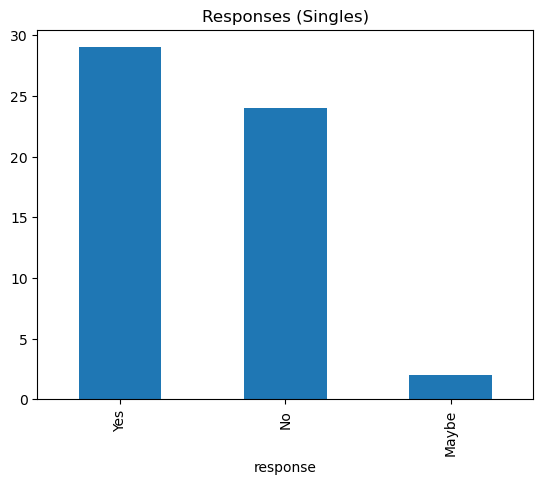

In [9]:
df_singles = extract_and_analyze_results(usa_singles, "Singles")


################# Analyzing results for Families... #################
Extraction raw result message: {'content': '{"response":"No","justification":"While I appreciate the idea of luxury and relaxation, my current situation as a stay-at-home parent means that I prioritize family-friendly options. I would prefer a vacation that accommodates my children and allows us to create memories together rather than a quiet luxury getaway that excludes them."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response":"No","justification":"While I appreciate the concept of luxury and relaxation, my current situation as a stay-at-home parent means that I prioritize family-friendly options. I would prefer a vacation that accommodates my children and allows us to create memories together, rather than a quiet luxury getaway meant for adults only."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response":"No","justification":"W

2025-04-19 17:45:40,987 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Extraction raw result message: {'content': '{"response":"No","justification":"While I appreciate the idea of luxury and calm getaways, my current situation as a stay-at-home parent means that I prioritize family-friendly options. I would prefer a vacation that accommodates my children and allows us to spend quality time together, rather than a luxury experience that excludes them. Additionally, financial constraints make it essential for me to choose vacations that are budget-friendly and suitable for the whole family."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response": "Yes", "justification": "I appreciate the focus on luxury and relaxation, which aligns with my desire for a calm getaway. I often look for places that provide a peaceful environment, and knowing that your service aims to avoid fake reviews and bad experiences is reassuring. While I do enjoy adventure, I find that a quiet luxury vacation would be a refreshing change, especia

2025-04-19 17:52:56,337 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Extraction raw result message: {'content': '{"response": "No", "justification": "My current situation as a stay-at-home mom with young children means that I prioritize family-friendly vacations where my kids can enjoy themselves. I would prefer a destination that caters to families rather than an adult-only environment. Additionally, I have to consider our budget, and luxury vacations might not be feasible for us right now."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response":"No","justification":"While I appreciate the idea of luxury and relaxation, my current focus is on family-friendly activities and experiences that cater to my children\'s needs."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response":"No","justification":"While I appreciate the idea of luxury and calm getaways, I often prioritize family-friendly options that allow my children to join in on the fun. I would prefer a vacation that

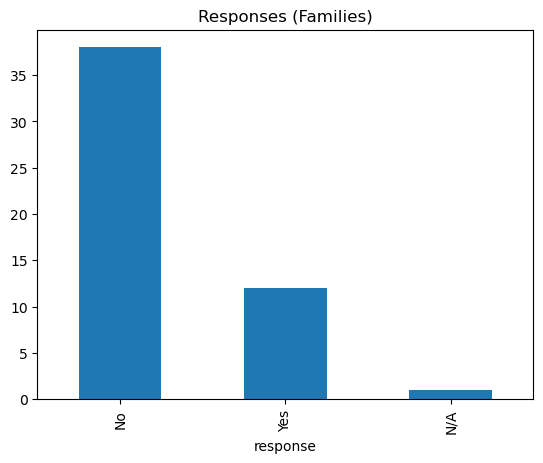

In [10]:
df_families = extract_and_analyze_results(usa_families, "Families")

################# Analyzing results for Couples... #################
Extraction raw result message: {'content': '{"response": "Yes", "justification": "I would use your new service, \'WanderLux.\' I appreciate the focus on luxury and romantic vacations, especially in beachfront and spa destinations. Given my busy job as a nurse, I often look for quiet and calm getaways to recharge. Knowing that your service aims to provide genuine experiences without fake reviews is very appealing to me."}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response": "N/A", "justification": null}', 'refusal': None, 'role': 'assistant'}
Extraction raw result message: {'content': '{"response":"Yes","justification":"I would consider using your new service, WanderLux. Given my current situation, I appreciate the idea of a quiet and calm getaway, especially since I often feel overwhelmed with studying and supporting my boyfriend. A luxury vacation at a beachfront or spa des

2025-04-19 18:02:07,367 - tinytroupe - WARNING - [1] Rate limit error, waiting a bit and trying again.


Extraction raw result message: {'content': '{"response":"Yes","justification":"I would use your service because I value the idea of finding genuine, high-quality experiences without the hassle of sifting through unreliable reviews. I often look for quiet and luxurious getaways to recharge, and your focus on adult-only destinations aligns perfectly with my preferences."}', 'refusal': None, 'role': 'assistant'}
   response                                      justification
0       Yes  I would use your new service, 'WanderLux.' I a...
1       N/A                                               None
2       Yes  I would consider using your new service, Wande...
3       Yes  I appreciate the focus on luxury and relaxatio...
4       Yes  I appreciate the focus on luxury and romantic ...
5       Yes  I appreciate the focus on quiet and calm getaw...
6       Yes  I appreciate the focus on luxury and relaxatio...
7       Yes  I would likely use it for my vacation next yea...
8       Yes  I appre

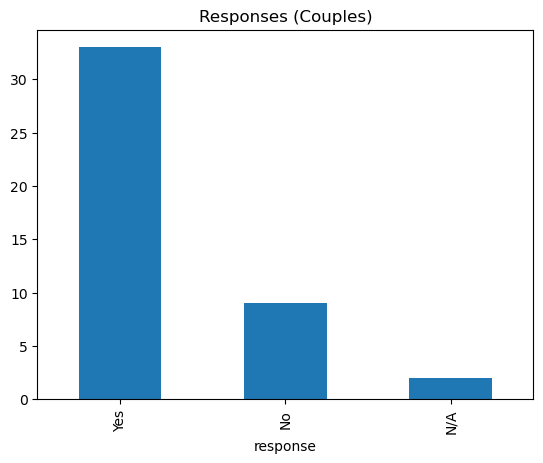

In [11]:
df_couples = extract_and_analyze_results(usa_couples, "Couples")

In [52]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
import numpy as np

def plot_combined_responses(title, name_to_df, individual_responses=None):
    """
    Combine the given dataframes in a single chart with grouped bars.
    Each dataframe is a different color and is properly labeled.
    
    Parameters:
    -----------
    title : str
        Title for the plot
    name_to_df : dict
        Dictionary mapping names to dataframes
    individual_responses : list, optional
        List of responses to count individually. If None, only 'Yes' and 'No' are counted individually.
        All other responses will be grouped as "Others".
    """
    print(f"################# Plotting combined responses for {title}... #################")
    
    # If individual_responses is not provided, default to Yes and No
    if individual_responses is None:
        individual_responses = ["Yes", "No"]
    
    # Get unique categories (individual responses + "Others")
    categories = individual_responses.copy()
    
    # Prepare data for grouped bar chart
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Define a colormap
    cmap = matplotlib.colormaps['tab10']
    
    # Calculate bar width based on number of groups
    num_groups = len(name_to_df)
    bar_width = 0.8 / num_groups  # Adjust the 0.8 to control spacing
    
    # Check if we need to add "Others" category
    has_others = False
    for df in name_to_df.values():
        if any(resp not in [r.lower() for r in individual_responses] for resp in [r.lower() for r in df["response"].unique()]):
            has_others = True
            break
    
    if has_others and "Others" not in categories:
        categories.append("Others")
    
    # For each category, plot grouped bars for each dataframe
    for i, category in enumerate(categories):
        for j, (name, df) in enumerate(name_to_df.items()):
            # Calculate the position for this bar
            position = i + (j - num_groups/2 + 0.5) * bar_width
            
            # Count occurrences for this category
            if category == "Others":
                # Count all responses that are not in individual_responses (case-insensitive)
                count = sum(df["response"].value_counts().get(resp, 0) 
                           for resp in df["response"].unique() 
                           if not any(resp.lower() == ind.lower() for ind in individual_responses))
            else:
                # Count occurrences of this category (case-insensitive)
                count = sum(df["response"].value_counts().get(resp, 0) 
                           for resp in df["response"].unique() 
                           if resp.lower() == category.lower())
            
            # Plot the bar
            ax.bar(position, count, width=bar_width, alpha=1.0, 
                   label=name if i == 0 else "", color=cmap(j % 10))
    
    # Set the x-ticks in the middle of each group
    ax.set_xticks(np.arange(len(categories)))
    ax.set_xticklabels(categories, fontsize=12)
    
    # Increase font sizes for better readability
    plt.title(f"Combined Responses ({title})", fontsize=16)
    plt.xlabel("Response", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.legend(fontsize=12)
    
    # Also increase tick label sizes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.tight_layout()
    plt.show()

################# Plotting combined responses for travel preferences by group... #################


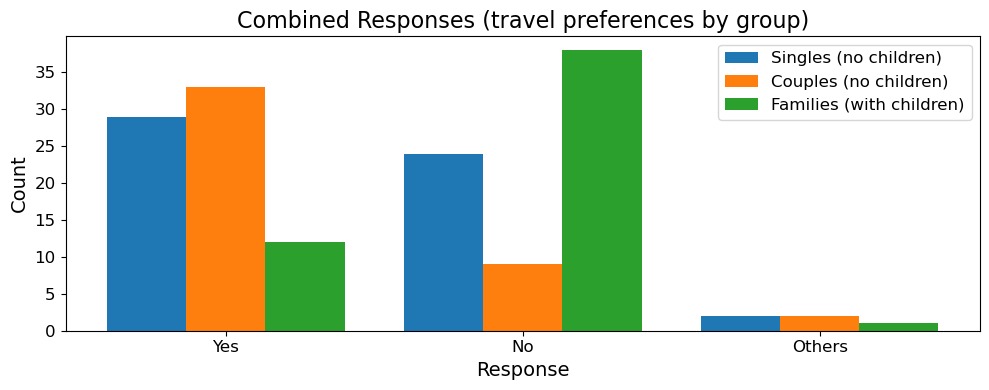

In [53]:
plot_combined_responses("travel preferences by group", 
                        {"Singles (no children)": df_singles, 
                         "Couples (no children)": df_couples,
                         "Families (with children)": df_families})